# **Taller 2 - Servicios inmobiliarios**

### **Integrantes:**
- María Alejandra Pérez Petro - 201923972
- Daniel Esteban Aguilera Figueroa - 202010592 

### Librerias

Se importan las librerías necesarias para el análisis de los datos.

In [3]:
import numpy as np
import pandas as pd
    
# visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# estadisticas
from scipy.stats import chi2_contingency, pearsonr, ttest_ind, f_oneway
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [4]:
%matplotlib inline

In [5]:
pd.set_option('display.float_format', '{:.2f}'.format)  # 2 decimales, sin notación científica


# **1. Entendimiento de los datos**
En esta sección se cargan los datos presentados en el archivo `apartamentos.csv`, se revisan las dimensiones y se seleccionan las caracteristicas a analizar.

Se cargan los datos

In [6]:
apartamentos_df: pd.DataFrame = pd.read_csv("./data/apartamentos.csv")

Se revisan las dimensiones del dataset. Este cuenta con 46 columnas y 43013 filas

In [7]:
apartamentos_df.shape

(43013, 46)

Se listan los atributos (columnas) del dataset y sus tipos

In [8]:
apartamentos_df.dtypes

_id                         object
codigo                      object
tipo_propiedad              object
tipo_operacion              object
precio_venta               float64
area                       float64
habitaciones               float64
banos                      float64
administracion             float64
parqueaderos               float64
sector                      object
estrato                    float64
antiguedad                  object
latitud                    float64
longitud                   float64
direccion                   object
descripcion                 object
website                     object
last_view                   object
datetime                    object
url                         object
timeline                    object
estado                      object
compañia                    object
precio_arriendo            float64
jacuzzi                    float64
piso                       float64
closets                    float64
chimenea            

se muestran las primeras filas para entender la estructura de los datos

In [9]:
apartamentos_df.head()

,_id,codigo,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,...,vigilancia,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm,parque_cercano,distancia_parque_m,is_cerca_parque
0,66d86c7eceda690e85508760,4133491,APARTAMENTO,VENTA,339000000.00,76.00,3.00,2.00,300000.00,1.00,...,0.00,False,SUBA,URB. PICADELLY,Toberin - Foundever,1142.45,0,PARQUE VECINAL DESARROLLO CANTALEJO URBANIZACI...,426.09,1
1,66d86c7eceda690e85508761,3889852,APARTAMENTO,VENTA,223000000.00,63.00,3.00,2.00,NaN,0.00,...,0.00,False,USAQUEN,BARRANCAS PERLAS DEL NORTE,Mazurén,2384.89,0,PARQUE ZONAL ALTA BLANCA,472.47,1
2,66d86c7eceda690e85508762,4386770,APARTAMENTO,VENTA,440898168.00,54.00,3.00,2.00,305000.00,0.00,...,0.00,False,LOS MARTIRES,SAN VICTORINO,De La Sabana,232.22,1,PARQUE METROPOLITANO TERCER MILENIO,961.29,0
3,66d86c7eceda690e85508763,4210060,APARTAMENTO,VENTA,158000000.00,43.00,2.00,2.00,106600.00,0.00,...,0.00,False,SUBA,LA ESTRELLA II,Portal Suba,2275.08,0,PARQUE ZONAL LA GAITANA,539.98,0
4,66d86c7eceda690e85508764,4063762,APARTAMENTO,VENTA,222800000.00,48.00,3.00,2.00,151000.00,0.00,...,0.00,False,USAQUEN,HORIZONTES USAQUEN,Terminal,2099.16,0,PARQUE VECINAL DESARROLLO VERBENAL I,1661.14,0


De igual manera, se hace un profilling general para una mejor revisión de todas las variables

In [10]:
# from ydata_profiling import ProfileReport 
# profile = ProfileReport(apartamentos_df)

In [11]:
# profile.to_file('data/report.html')

## Top 10 atributos más importantes para el análisis

Considerando el funcionamiento del mercado inmobiliario bogotano, el objetivo de HabitAlpes de construir un modelo de estimación de precios confiable y los determinantes clásicos del valor de vivienda, se identifican los siguientes 10 atributos como los más relevantes para predecir el precio de venta de un apartamento:

1. `area`: Superficie total del apartamento en metros cuadrados. Es el predictor más influyente del precio porque refleja directamente el tamaño del activo. A mayor área, mayor precio absoluto, con variaciones según sector y estrato.

2. `habitaciones`: Cantidad de habitaciones disponibles. Este atributo determina la distribución interna y el potencial de uso del inmueble.

3. `banos`: Número total de baños. Está altamente correlacionado con el nivel de comodidad y el estándar del apartamento.

4. `estrato`: Clasificación socioeconómica (1 a 6).

5. `barrio`: Ubicación específica del inmueble.

6. `sector`: Zona general donde se ubica el apartamento.

7. `localidad`: División administrativa de Bogotá.

8. `parqueaderos`: Número de parqueaderos asignados.
9. `piso`: Nivel dentro del edificio en el que se ubica el apartamento.

10. `antiguedad`: Edad del inmueble. Los apartamentos más nuevos tienden a ser más costosos debido a mejores especificaciones, materiales más recientes y menor desgaste.

# **2. Calidad de los datos**

En esta sección se analiza la calidad de los datos de las variables seleccionadas. Sin embargo, a la hora de la creación del modelo es posible realizar una selección de variables más robusta con el fin de mejorar el modelo.

In [12]:
# Análisis de valores nulos en variables clave
vars_analisis = ['area', 'habitaciones', 'banos', 'parqueaderos', 'piso', 'antiguedad', 
                 'sector', 'localidad', 'barrio', 'estrato', 'precio_venta']

Creación de un nuevo dataframe donde guardaremos la versión limpia de los datos

In [13]:
df_clean = apartamentos_df.copy()

### **2.1. Completitud de los datos**

In [14]:
#Revisamos valores nulos sobre todo el dataset
display(apartamentos_df.isna().sum().sort_values(ascending=False))
numero_filas_con_nulos = apartamentos_df.isna().any(axis=1).sum()
print(f"Número de filas con al menos un valor nulo: {numero_filas_con_nulos}, lo que representa el {numero_filas_con_nulos / apartamentos_df.shape[0] * 100:.2f}% del total de filas.")


closets                    43013
piso                       43013
url                        42219
direccion                  42219
precio_arriendo            27184
precio_venta               15429
timeline                   13586
administracion              7925
compañia                    4530
sector                      1641
estado                       796
barrio                       193
antiguedad                    10
website                        2
salon_comunal                  2
terraza                        2
conjunto_cerrado               2
ascensor                       2
vigilancia                     2
piscina                        2
gimnasio                       2
datetime                       2
chimenea                       2
permite_mascotas               2
last_view                      2
jacuzzi                        2
parqueaderos                   1
habitaciones                   1
banos                          1
estrato                        1
latitud   

Número de filas con al menos un valor nulo: 43013, lo que representa el 100.00% del total de filas.


In [15]:
# Revisamos valores nulos en variables clave
nulos_df = pd.DataFrame({
    'Variable': vars_analisis,
    'Valores Nulos': [apartamentos_df[var].isnull().sum() for var in vars_analisis],
    'Porcentaje': [(apartamentos_df[var].isnull().sum() / len(apartamentos_df)) * 100 for var in vars_analisis]
})

nulos_df = nulos_df.sort_values('Porcentaje', ascending=False)

print("="*70)
print("ANÁLISIS DE VALORES NULOS")
print("="*70)
print(nulos_df.to_string(index=False))
print("="*70)

ANÁLISIS DE VALORES NULOS
    Variable  Valores Nulos  Porcentaje
        piso          43013      100.00
precio_venta          15429       35.87
      sector           1641        3.82
      barrio            193        0.45
  antiguedad             10        0.02
habitaciones              1        0.00
       banos              1        0.00
     estrato              1        0.00
parqueaderos              1        0.00
        area              0        0.00
   localidad              0        0.00


**Observaciones sobre la completitud de los datos:**
- La variable **`piso`** tiene 100% de valores nulos (43,013), lo que indica que esta información no está disponible en el dataset. Se descarta su uso para análisis futuros.
- **`precio_venta`** tiene 35.9% de valores nulos, lo cual es significativo para análisis de precios. Como está es la variable objetivo, se debe considerar su imputación o exclusión de filas.
- **`sector`** presenta 3.8% de valores nulos
- Variables como `area`, `habitaciones`, `banos`, `parqueaderos`, y `estrato` tienen <0.01% nulos

### **2.2. Unicidad de los datos**

In [16]:
# Revisamos duplicados sobre todo el dataset
num_duplicados = apartamentos_df.duplicated().sum()
print(f"Número de duplicados: {num_duplicados} (%{num_duplicados/len(apartamentos_df)*100:.2f})")

Número de duplicados: 0 (%0.00)


### **2.3. Consistencia de los datos**

Se procede a analizar la consistencia de las variables númericas y categóricas seleccionadas. Para las variables númericas se analizan estadísticas descriptivas y distribuciones, mientras que para las categóricas se revisan frecuencias y valores únicos.

## **Variables Numéricas**

In [17]:
vars_numericas = ['area', 'habitaciones', 'banos', 'parqueaderos', 'estrato', 'precio_venta']

#### Estadísticas Descriptivas - Variables Numérica

In [18]:

apartamentos_df[vars_numericas].describe().T

,count,mean,std,min,25%,50%,75%,max
area,43013.00,180.03,9163.00,0.00,63.00,100.00,174.00,1900000.00
habitaciones,43012.00,2.62,0.85,1.00,2.00,3.00,3.00,7.00
banos,43012.00,2.70,1.20,0.00,2.00,3.00,4.00,6.00
parqueaderos,43012.00,1.66,1.11,-2.00,1.00,2.00,2.00,30.00
estrato,43012.00,4.84,1.24,0.00,4.00,5.00,6.00,6.00
precio_venta,27584.00,2364794142.84,55741976390.87,1000000.00,402900000.00,700000000.00,1330000000.00,4250000000000.00


**Área (m²)**
- **Media:** 180 m²
- **Mediana:** 100 m²  
- **Rango:** 0 - 1,900,000 m² (valores extremos sugieren outliers o errores)

In [19]:
apartamentos_df["area"].value_counts().sort_index()

area
0.00          19
1.00           8
2.00           3
4.93           1
5.00           1
              ..
9999.00        1
13985.00       1
15413.00       1
19621.00       1
1900000.00     1
Name: count, Length: 4494, dtype: int64

Un apartamento con area 0 metros cuadrados no es realista. En general, un área por debajo de 10 m² es inviable para un apartamento. Por suparte un area 1.900.000 de metros cuadrados también es poco realista. Procedemos a filtrar estos valores.

In [20]:
# Cálculo de límite usando SIEMPRE los datos originales
upper_area = apartamentos_df["area"].quantile(0.99)

# Filtro aplicado a df_clean, pero con límite del original
df_clean = df_clean[(df_clean["area"] > 10) & (df_clean["area"] < upper_area)]

 **Estrato**
- **Media:** 4.8
- **Rango:** 0-6

En Bogotá no hay apartamentos de estrato 0. Eliminamos esos registros. Los valores validos de estrato son 1 a 6. 

In [21]:
filtro_estrato = df_clean['estrato'].isin([1, 2, 3, 4, 5, 6])
df_clean = df_clean[filtro_estrato]

**Parqueaderos**
- **Media:** 1.66 parqueaderos
- **Rango:** -2 a 30 parqueaderos

In [22]:
apartamentos_df["parqueaderos"].value_counts().sort_index()

parqueaderos
-2.00        1
0.00      6615
1.00     12678
2.00     15525
3.00      5045
4.00      3143
10.00        2
20.00        2
30.00        1
Name: count, dtype: int64

No es razonable valores negativos para parqueaderos, ni un número tan alto como 30 para un apartamento/casa. Se toma la decisión de eliminar los valores negativos y aquellos que superen 10 parqueaderos, ya que no es común que un apartamento tenga más de 10 parqueaderos asignados.

In [23]:
filter_parqueaderos = (df_clean["parqueaderos"] >= 0) & (df_clean["parqueaderos"] <= 10)
df_clean = df_clean[filter_parqueaderos]

**Habitaciones**
- **Media:** 2.6 habitaciones
- **Rango:** 1-7 habitaciones

 **Baños**
- **Media:** 1.8 baños
- **Rango:** 1-7 baños


 **Precio de Venta**
- **Media:** $2,364,794,000 COP (~2.36 mil millones)
- **Mediana:** $700,000,000 COP
- Gran diferencia entre media y mediana indica presencia de propiedades de muy alto valor

In [24]:
# Eliminamos filas con valores nulos en 'precio_venta' ya que es la variable objetivo principal
filtro_precio = (df_clean["precio_venta"] > 0) & (df_clean["precio_venta"] < 5e9) & (df_clean["precio_venta"].notnull())
df_clean = df_clean[filtro_precio].reset_index(drop=True)

#### Histograma de variables númericas

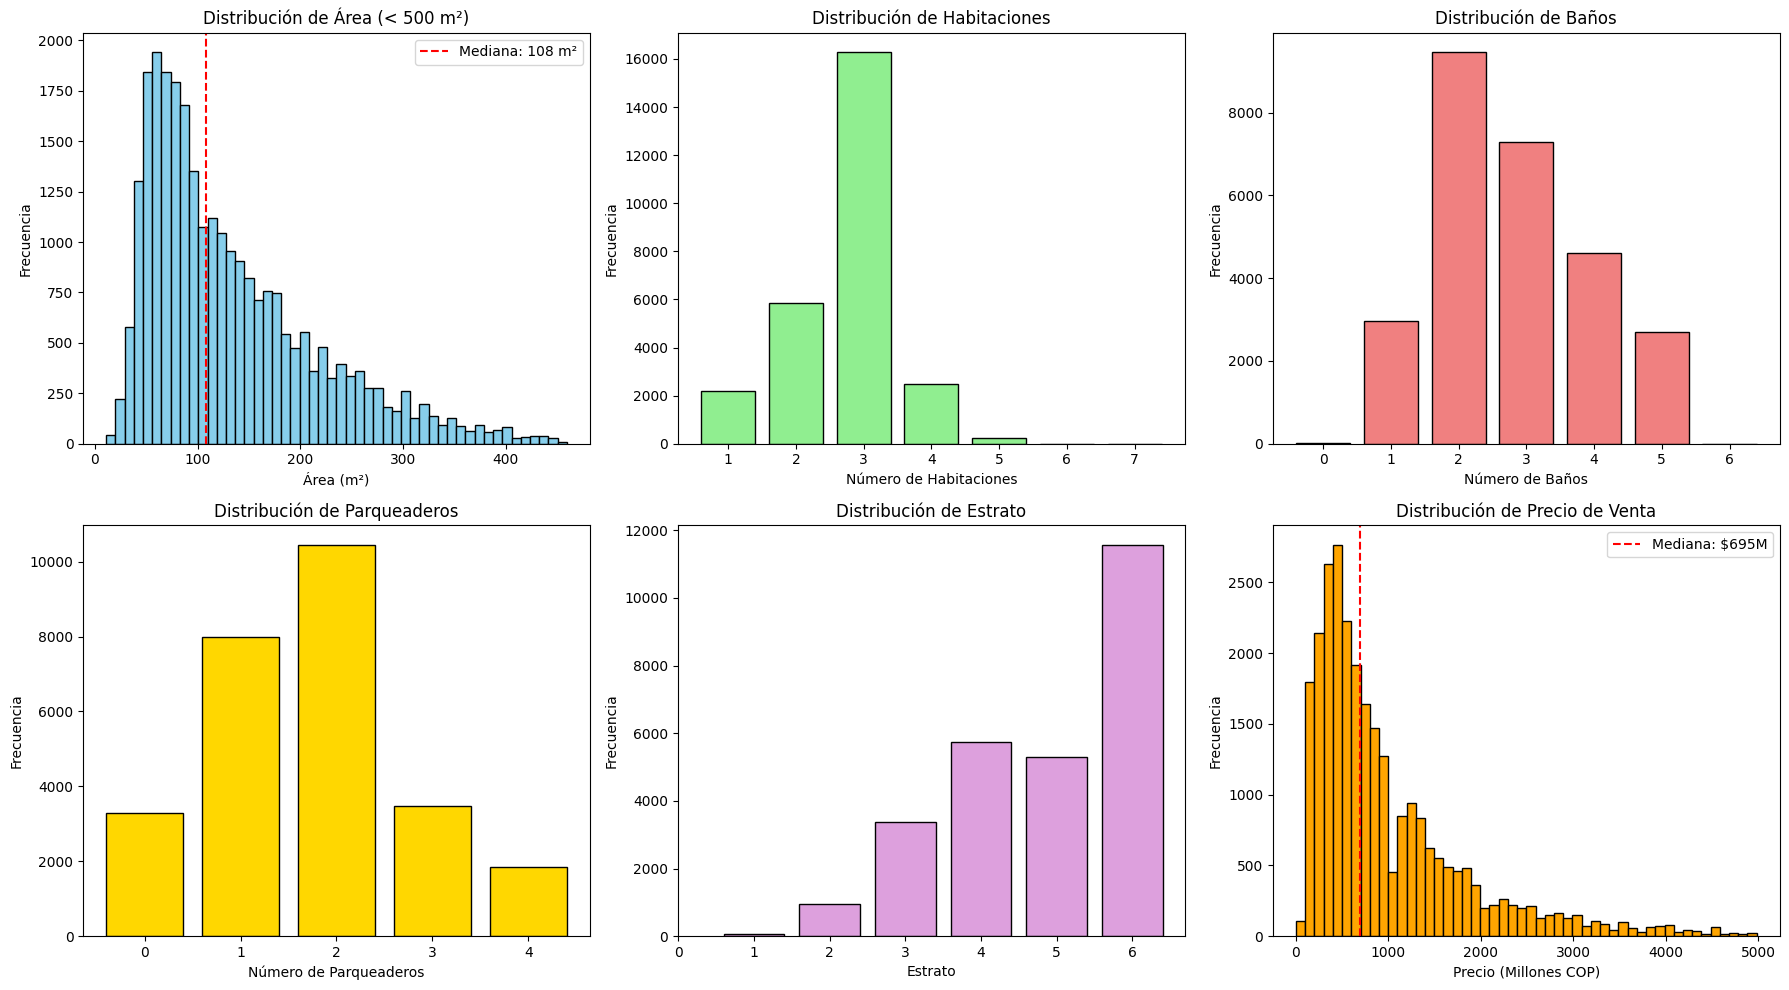

In [25]:
# Visualización de distribuciones
df_plot = df_clean.copy()
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Área (filtrada para mejor visualización)
axes[0, 0].hist(df_plot['area'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribución de Área (< 500 m²)')
axes[0, 0].set_xlabel('Área (m²)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].axvline(df_plot['area'].median(), color='red', linestyle='--', label=f'Mediana: {df_plot["area"].median():.0f} m²')
axes[0, 0].legend()

# 2. Habitaciones
habitaciones_counts = df_plot['habitaciones'].value_counts().sort_index()
axes[0, 1].bar(habitaciones_counts.index, habitaciones_counts.values, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribución de Habitaciones')
axes[0, 1].set_xlabel('Número de Habitaciones')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_xticks(range(1, 8))

# 3. Baños
banos_counts = df_plot['banos'].value_counts().sort_index()
axes[0, 2].bar(banos_counts.index, banos_counts.values, color='lightcoral', edgecolor='black')
axes[0, 2].set_title('Distribución de Baños')
axes[0, 2].set_xlabel('Número de Baños')
axes[0, 2].set_ylabel('Frecuencia')

# 4. Parqueaderos
parqueaderos_counts = df_plot['parqueaderos'].value_counts().sort_index()
axes[1, 0].bar(parqueaderos_counts.index, parqueaderos_counts.values, color='gold', edgecolor='black')
axes[1, 0].set_title('Distribución de Parqueaderos')
axes[1, 0].set_xlabel('Número de Parqueaderos')
axes[1, 0].set_ylabel('Frecuencia')

# 5. Estrato
estrato_counts = df_plot['estrato'].value_counts().sort_index()
axes[1, 1].bar(estrato_counts.index, estrato_counts.values, color='plum', edgecolor='black')
axes[1, 1].set_title('Distribución de Estrato')
axes[1, 1].set_xlabel('Estrato')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_xticks(range(0, 7))

# 6. Precio de Venta (log scale para mejor visualización)
axes[1, 2].hist(df_plot['precio_venta'] / 1e6, bins=50, color='orange', edgecolor='black')
axes[1, 2].set_title('Distribución de Precio de Venta')
axes[1, 2].set_xlabel('Precio (Millones COP)')
axes[1, 2].set_ylabel('Frecuencia')
axes[1, 2].axvline(df_plot['precio_venta'].median() / 1e6, color='red', linestyle='--', 
                    label=f'Mediana: ${df_plot["precio_venta"].median()/1e6:.0f}M')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

#### Boxplots de variables númericas

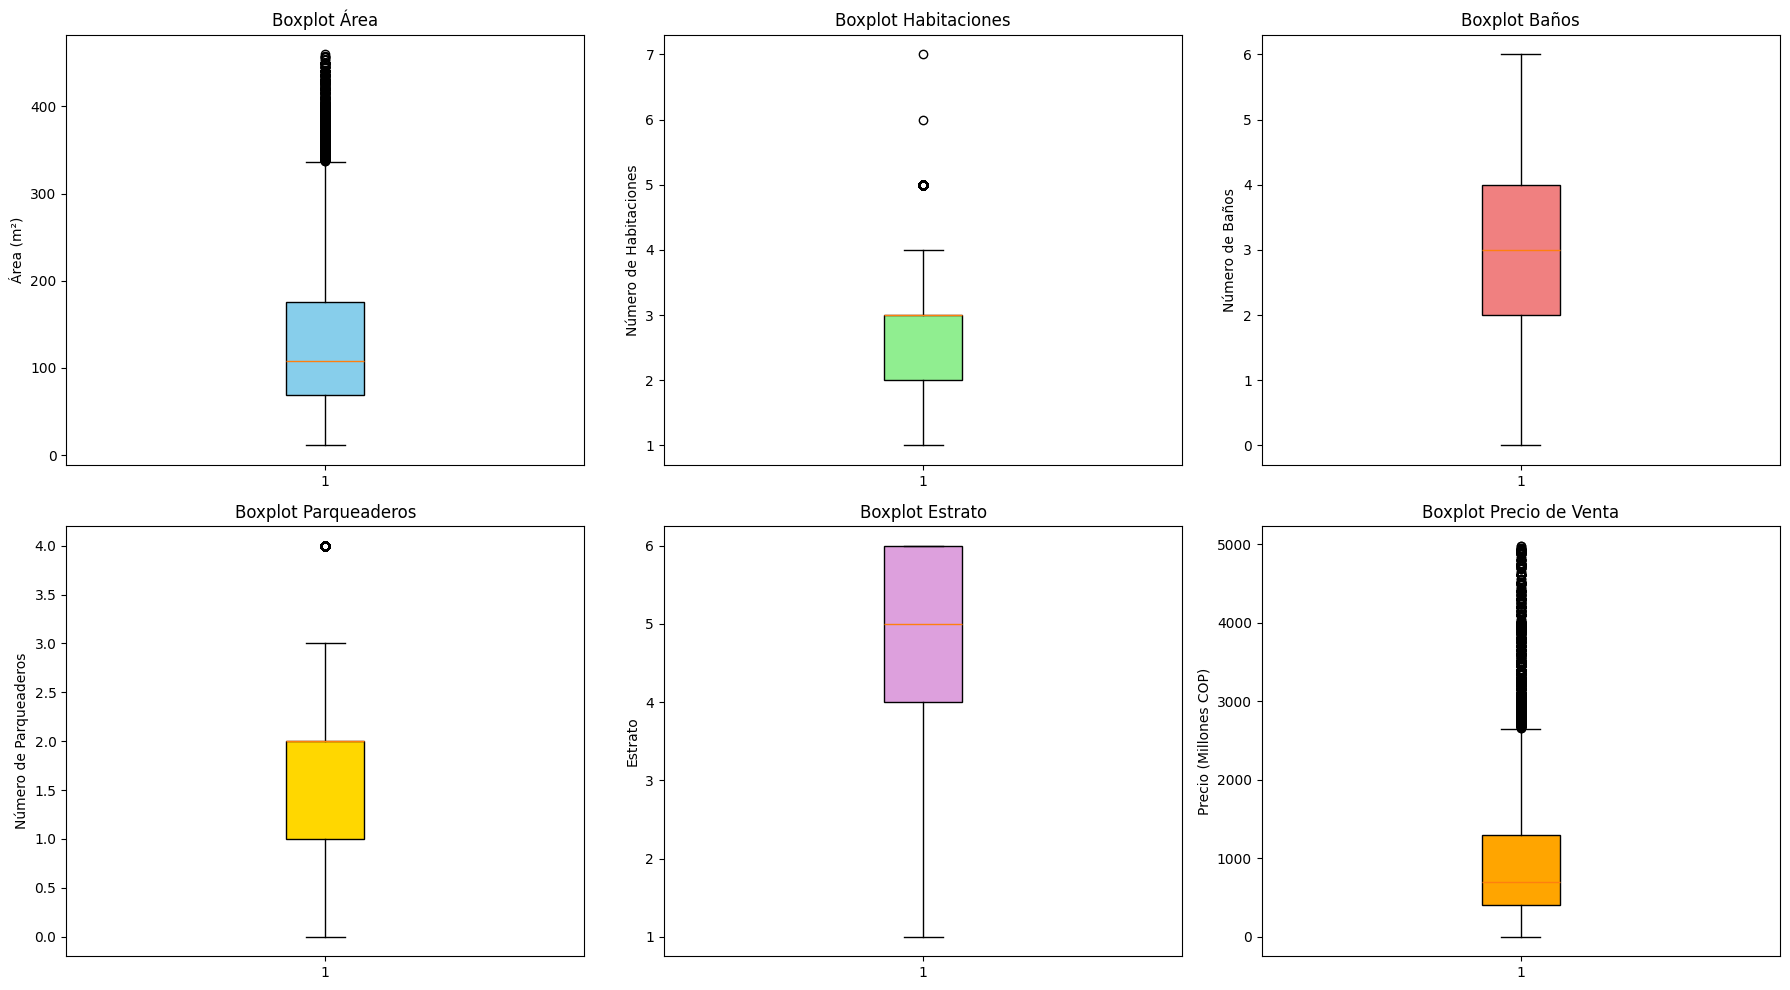

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
df_plot = df_clean.copy()
# 1. Área 
axes[0, 0].boxplot(df_plot['area'], vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))
axes[0, 0].set_title('Boxplot Área')
axes[0, 0].set_ylabel('Área (m²)')

# 2. Habitaciones
axes[0, 1].boxplot(df_plot['habitaciones'].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
axes[0, 1].set_title('Boxplot Habitaciones')
axes[0, 1].set_ylabel('Número de Habitaciones')

# 3. Baños
axes[0, 2].boxplot(df_plot['banos'].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
axes[0, 2].set_title('Boxplot Baños')
axes[0, 2].set_ylabel('Número de Baños')

# 4. Parqueaderos
axes[1, 0].boxplot(df_plot['parqueaderos'].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='gold'))
axes[1, 0].set_title('Boxplot Parqueaderos')
axes[1, 0].set_ylabel('Número de Parqueaderos')

# 5. Estrato
axes[1, 1].boxplot(df_plot['estrato'].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='plum'))
axes[1, 1].set_title('Boxplot Estrato')
axes[1, 1].set_ylabel('Estrato')

# 6. Precio de Venta 
axes[1, 2].boxplot(df_plot['precio_venta'] / 1e6, vert=True, patch_artist=True, boxprops=dict(facecolor='orange'))
axes[1, 2].set_title('Boxplot Precio de Venta')
axes[1, 2].set_ylabel('Precio (Millones COP)')

plt.tight_layout()
plt.show()

## **Variables Categóricas**

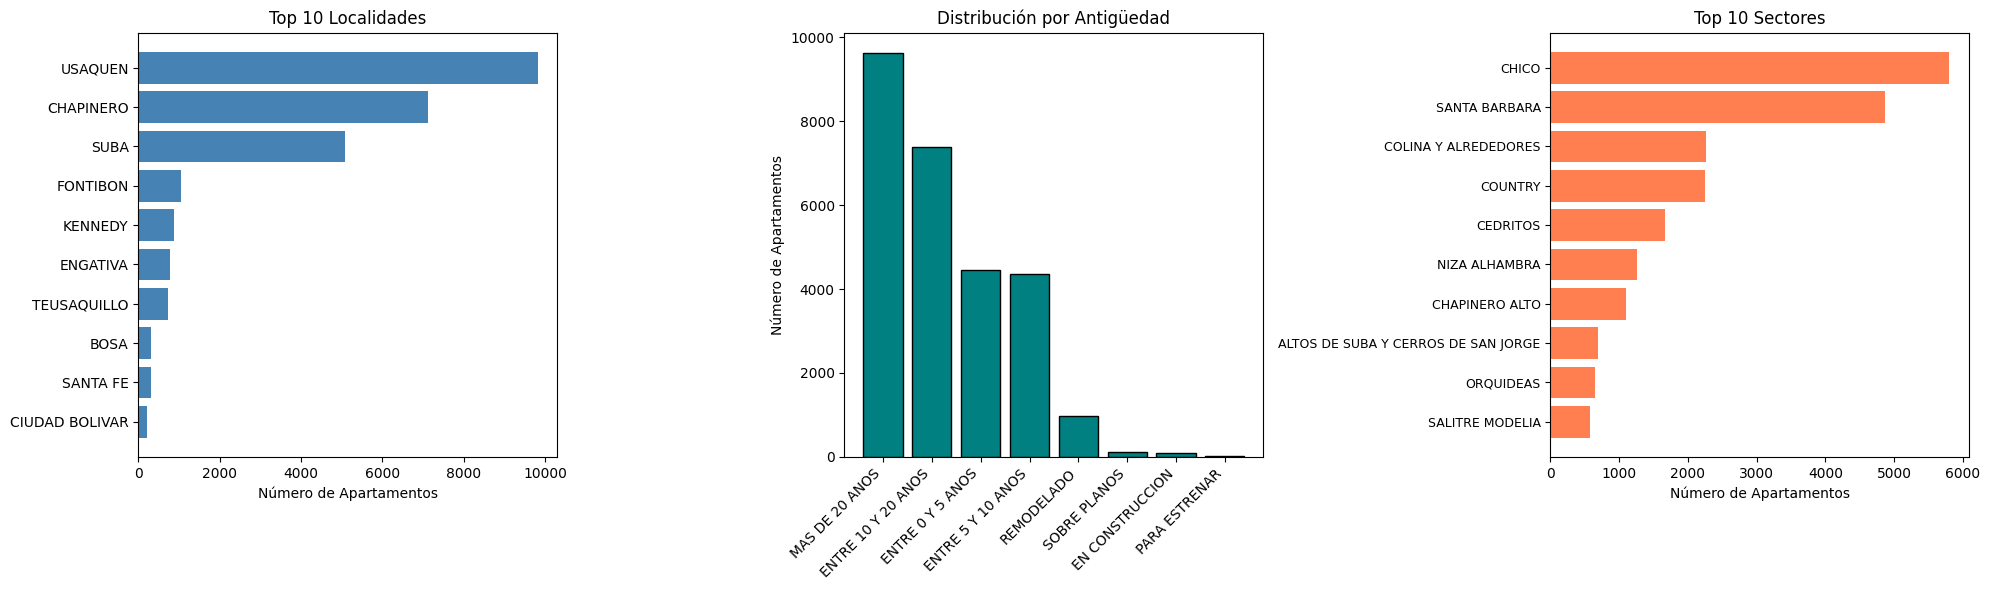

In [27]:
# Visualización de variables categóricas
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

df_plot = df_clean.copy()
# 1. Top 10 Localidades
localidad_top10 = df_plot['localidad'].value_counts().head(10)
axes[0].barh(range(len(localidad_top10)), localidad_top10.values, color='steelblue')
axes[0].set_yticks(range(len(localidad_top10)))
axes[0].set_yticklabels(localidad_top10.index)
axes[0].set_xlabel('Número de Apartamentos')
axes[0].set_title('Top 10 Localidades')
axes[0].invert_yaxis()

# 2. Antigüedad
antiguedad_counts = df_plot['antiguedad'].value_counts()
axes[1].bar(range(len(antiguedad_counts)), antiguedad_counts.values, color='teal', edgecolor='black')
axes[1].set_xticks(range(len(antiguedad_counts)))
axes[1].set_xticklabels(antiguedad_counts.index, rotation=45, ha='right')
axes[1].set_ylabel('Número de Apartamentos')
axes[1].set_title('Distribución por Antigüedad')

# 3. Top 10 Sectores
sector_top10 = df_plot['sector'].value_counts().head(10)
axes[2].barh(range(len(sector_top10)), sector_top10.values, color='coral')
axes[2].set_yticks(range(len(sector_top10)))
axes[2].set_yticklabels(sector_top10.index, fontsize=9)
axes[2].set_xlabel('Número de Apartamentos')
axes[2].set_title('Top 10 Sectores')
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()

## **Análisis Multivariado**

#### Matriz de correlación

In [28]:
def calculate_and_plot_correlation_matrix(df_num, method='pearson', mask = False):
    correlation_matrix = df_num.corr(method=method)

    # Crear máscara para ocultar la parte inferior
    mask = None if not mask else np.triu(np.ones_like(correlation_matrix, dtype=bool))

    # Heatmap solo parte superior
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix,
                mask=mask,
                annot=True,
                cmap='RdBu_r',
                center=0,
                square=True,
                fmt='.3f',
                cbar_kws={'label': 'Coeficiente de Correlación'})
    plt.title(f'Matriz de Correlación ({method.capitalize()})')
    plt.tight_layout()
    plt.show()
    return correlation_matrix

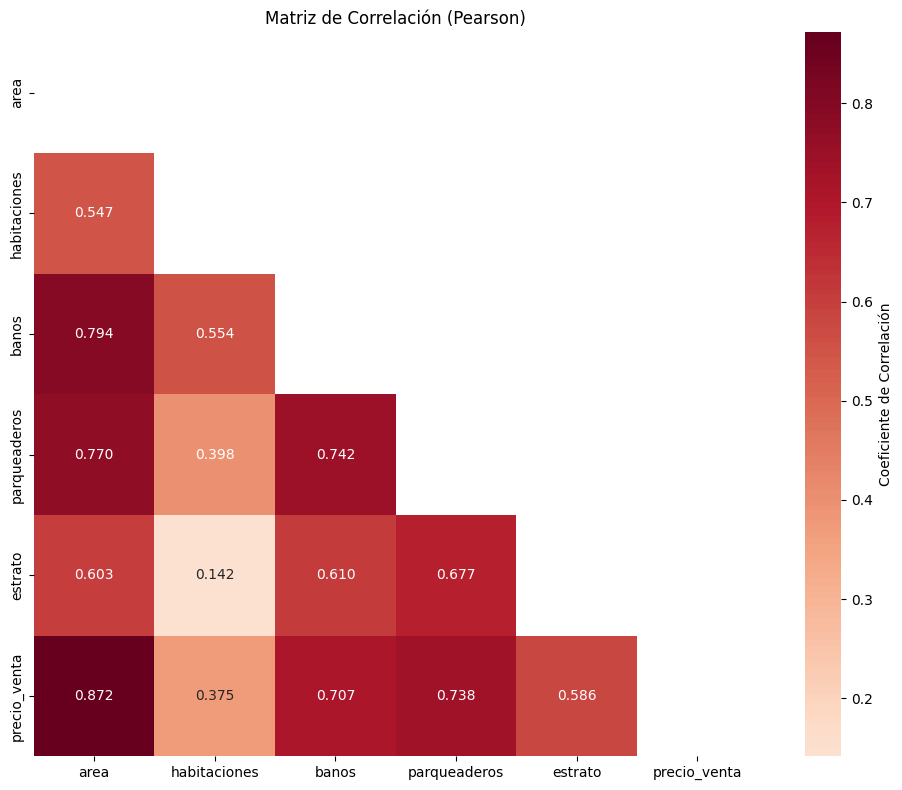

,area,habitaciones,banos,parqueaderos,estrato,precio_venta
area,1.00,0.55,0.79,0.77,0.60,0.87
habitaciones,0.55,1.00,0.55,0.40,0.14,0.37
banos,0.79,0.55,1.00,0.74,0.61,0.71
parqueaderos,0.77,0.40,0.74,1.00,0.68,0.74
estrato,0.60,0.14,0.61,0.68,1.00,0.59
precio_venta,0.87,0.37,0.71,0.74,0.59,1.00


In [29]:
# Matriz de correlación para variables numéricas
vars_correlacion = ['area', 'habitaciones', 'banos', 'parqueaderos', 'estrato', 'precio_venta']
df_correlacion = df_clean[vars_correlacion].dropna()

calculate_and_plot_correlation_matrix(df_correlacion, method='pearson', mask=True)

La matriz de correlación de Pearson entre las variables estructurales del apartamento y el precio de venta muestra que todas las relaciones son positivas, destacándose una correlación muy fuerte entre **área y precio_venta** (0,872), lo que confirma que los apartamentos más grandes tienden a ser más costosos. También se evidencian correlaciones altas entre el precio y el número de **parqueaderos** (0,738), así como con el número de **baños** (0,707) y el **estrato** (0,586). La variable **habitaciones** presenta una correlación moderada con el precio (0,375), menor que la del área, lo que sugiere que el metraje total pesa más que el simple conteo de cuartos. Adicionalmente, se observa una fuerte asociación entre las propias variables físicas, como área con baños (0,794) y parqueaderos (0,770), lo que refleja que los apartamentos más amplios suelen ofrecer más servicios y parqueaderos.


#### Precio de venta vs Estrato

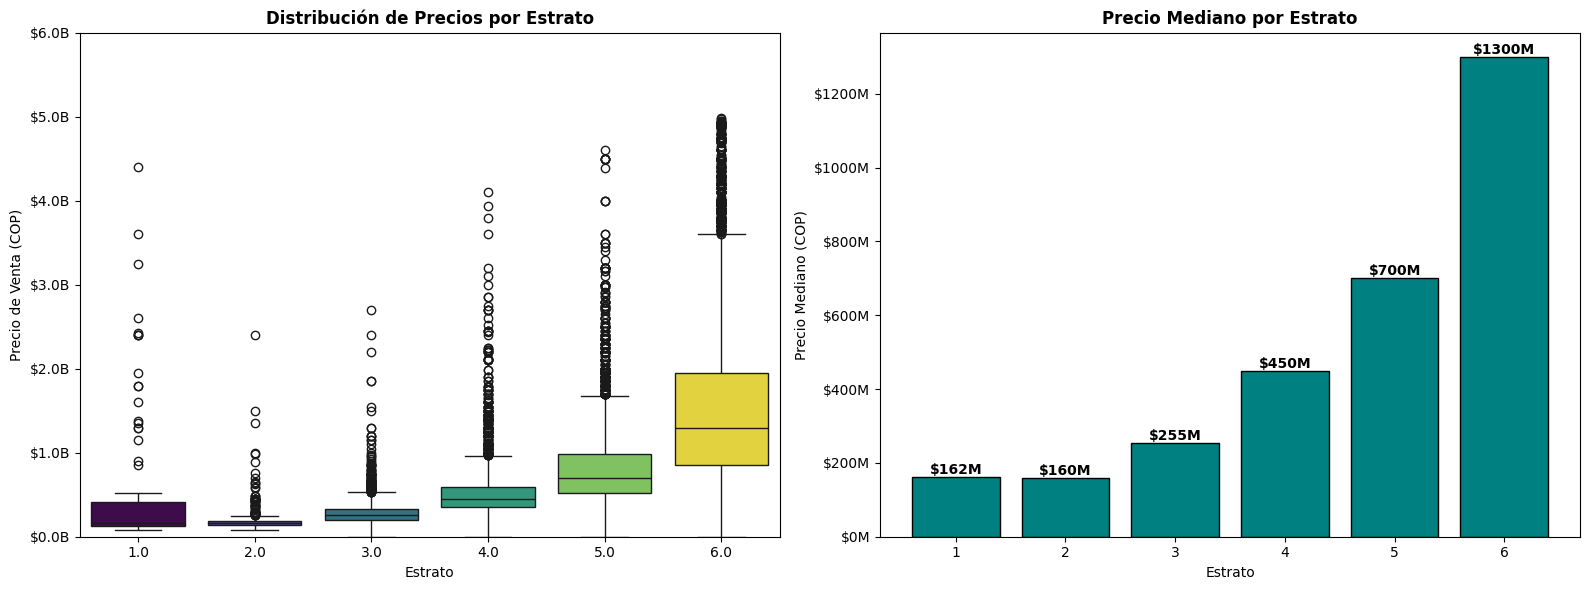

In [30]:
# Análisis de precio por estrato
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Boxplot de precio por estrato


sns.boxplot(data=df_clean, x='estrato', y='precio_venta', ax=axes[0], palette='viridis', hue = "estrato", legend=False)
axes[0].set_title('Distribución de Precios por Estrato', fontweight='bold')
axes[0].set_xlabel('Estrato')
axes[0].set_ylabel('Precio de Venta (COP)')
axes[0].set_ylim(0, 6e9)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e9:.1f}B'))

# Gráfico 2: Precio promedio por estrato
precio_por_estrato = df_clean.groupby('estrato')['precio_venta'].median().sort_index()
axes[1].bar(precio_por_estrato.index, precio_por_estrato.values, color='teal', edgecolor='black')
axes[1].set_title('Precio Mediano por Estrato', fontweight='bold')
axes[1].set_xlabel('Estrato')
axes[1].set_ylabel('Precio Mediano (COP)')
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.0f}M'))

for i, (estrato, precio) in enumerate(precio_por_estrato.items()):
    axes[1].text(estrato, precio, f'${precio/1e6:.0f}M', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

La Figura muestra cómo el precio de los apartamentos aumenta claramente con el estrato socioeconómico. En los boxplots de la izquierda se observa que los estratos 1 y 2 concentran precios bajos y poca dispersión, mientras que a partir del estrato 4 los precios se elevan y aparecen numerosos outliers de alto valor, especialmente en estratos 5 y 6. El gráfico de barras de la derecha resume este patrón: la mediana pasa de alrededor de **$160–$162M** en estratos 1–2 a **$255M** en estrato 3, **$450M** en estrato 4, **$700M** en estrato 5 y cerca de **$1.300M** en estrato 6, lo que confirma que el estrato es un fuerte determinante del precio de venta.


#### Precio de venta vs Número de parqueaderos

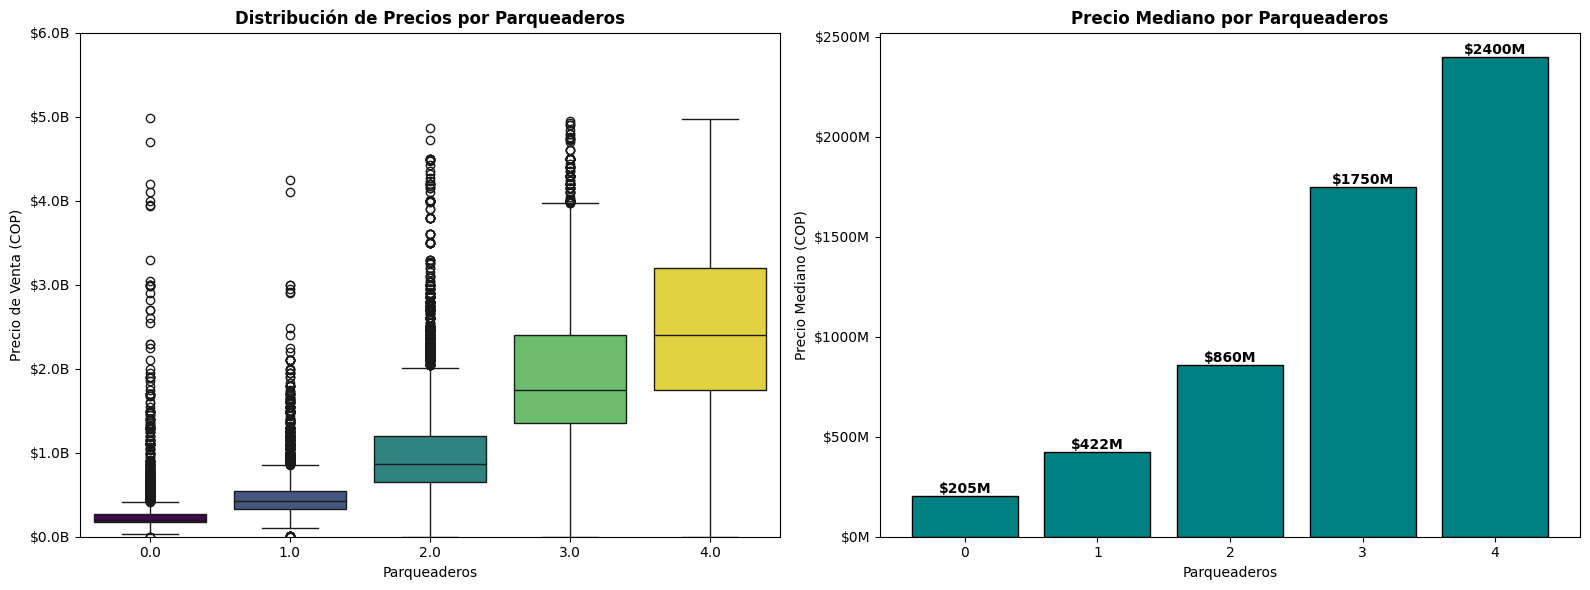

In [31]:
# Análisis de precio por estrato
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Boxplot de precio por parqueaderos
sns.boxplot(data=df_clean, x='parqueaderos', y='precio_venta', ax=axes[0], palette='viridis', hue = "parqueaderos", legend=False)
axes[0].set_title('Distribución de Precios por Parqueaderos', fontweight='bold')
axes[0].set_xlabel('Parqueaderos')
axes[0].set_ylabel('Precio de Venta (COP)')
axes[0].set_ylim(0, 6e9)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e9:.1f}B'))

# Gráfico 2: Precio promedio por parqueaderos
precio_por_parqueaderos = df_clean.groupby('parqueaderos')['precio_venta'].median().sort_index()
axes[1].bar(precio_por_parqueaderos.index, precio_por_parqueaderos.values, color='teal', edgecolor='black')
axes[1].set_title('Precio Mediano por Parqueaderos', fontweight='bold')
axes[1].set_xlabel('Parqueaderos')
axes[1].set_ylabel('Precio Mediano (COP)')
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.0f}M'))

for i, (parqueaderos, precio) in enumerate(precio_por_parqueaderos.items()):
    axes[1].text(parqueaderos, precio, f'${precio/1e6:.0f}M', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

Las figuras muestran cómo el número de parqueaderos se relaciona con el precio de venta del apartamento. En los boxplots de la izquierda se observa que, a medida que aumentan los parqueaderos de 0 a 4, la distribución de precios se desplaza hacia valores más altos y se hace más dispersa, con numerosos outliers de alto valor en 3 y 4 parqueaderos. El gráfico de barras de la derecha resume este patrón: el precio mediano pasa de aproximadamente **$205M** sin parqueadero a **$422M** con uno, **$860M** con dos, **$1.750M** con tres y cerca de **$2.400M** con cuatro parqueaderos. Esto indica que contar con más parqueaderos está fuertemente asociado a apartamentos de mayor valor y refuerza la importancia de esta variable en el modelo de precios.


# **3. Modelado**

librerias necesarias para el modelado

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, root_mean_squared_error

## **3.1. Preparación de datos para el modelo**

En esta sección se preparan los datos para el entrenamiento del modelo de predicción de precios.

Se realizan las siguientes actividades:
- Limpieza de datos y manejo de valores nulos
- Selección de features
- División de datos en conjuntos y entrenamiento del modelo

In [33]:
features_selected = [
    'area', 'habitaciones', 'banos', 'parqueaderos', 
    'estrato', 'antiguedad', 'sector', 'localidad'
]

numeric_features = ['area', 'habitaciones', 'banos', 'parqueaderos', 
                    'estrato']

categorical_features = ['sector', 'localidad', 'antiguedad']

target_variable = 'precio_venta'

df_model = apartamentos_df[features_selected + [target_variable]].copy()

Revisando las variables de interés, tenemos que algunas tienen valores nulos. Procedemos a realizar la siguiente limpieza:

* `piso`: dado que la totalidad de sus filas cuentan con valores nulos, se elimina esta columna del análisis.
* `precio_venta`: Esta es la variable objetivo, por ende, al no poder usar valores nulos para el entrenamiento del modelo, se eliminan estas filas
* `sector`, `barrio`, `antiguedad`, `habitaciones`, `banos`, `estrato`, `parqueaderos`: Estas variables presentan valores nulos, sin embargo, al no ser una cantidad significativa, se procede a eliminar las filas que contienen estos valores nulos.

Adicionalmente, se eliminan los outliers extremos en el precio de venta y el área para mantener consistencia en el análisis.

In [34]:
def remove_outliers_iqr(df, col):
    """Elimina outliers en una columna usando el método IQR."""
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

In [35]:
# 1. Filtrar solo registros con precio_venta válido
df_model = df_model[df_model['precio_venta'].notna()].copy()

In [36]:
# 1. Eliminar valores negativos, todas las columnas númericas seleccionadas deben ser >= 0 
for col in numeric_features + [target_variable]:
    df_model = df_model[df_model[col] >= 0]

# 2. Eliminar valores de cero en columnas númericas donde no tiene sentido
for col in ['area', 'estrato', "precio_venta"]:
    df_model = df_model[df_model[col] > 0]

# 3. Eliminar outliers usando IQR
for col in ['area', 'habitaciones', 'parqueaderos', 'precio_venta']:
    df_model = remove_outliers_iqr(df_model, col)

# 4. Eliminar filas con valores nulos
df_model = df_model.dropna()

# 5. Eliminamos duplicados
df_model = df_model.drop_duplicates()

# 6. Transformar la variable objetivo usando log
df_model["precio_venta_log"] = np.log1p(df_model["precio_venta"])

df_model.shape

(20743, 10)

Se tiene entonces que el dataset reduce de 43013 a 20743 luego de realizar la limpieza

In [37]:

X = df_model[features_selected]
y = df_model['precio_venta_log']

Se establece un parámetro de reproducibilidad (random_state) para asegurar resultados consistentes.

In [38]:
seed = 42   

Se dividen los datos en conjuntos de entrenamiento (60%), validación (20%) y test (20%).

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.4,
    random_state=seed
)

X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, test_size=0.5, random_state=seed
)

In [40]:
X_train[numeric_features].describe()

,area,habitaciones,banos,parqueaderos,estrato
count,12445.00,12445.00,12445.00,12445.00,12445.00
mean,111.66,2.63,2.59,1.49,4.71
std,60.39,0.74,1.04,0.85,1.23
min,1.00,1.00,0.00,0.00,1.00
25%,64.00,2.00,2.00,1.00,4.00
50%,96.00,3.00,2.00,2.00,5.00
75%,148.00,3.00,3.00,2.00,6.00
max,344.72,4.00,5.00,3.00,6.00


In [41]:
print("Distribución de la variable objetivo (precio_venta en millones) en el conjunto de entrenamiento:")
np.expm1(y_train).describe()/1e6

Distribución de la variable objetivo (precio_venta en millones) en el conjunto de entrenamiento:


count      0.01
mean     741.28
std      476.84
min        1.10
25%      370.00
50%      620.00
75%      990.00
max     2180.00
Name: precio_venta_log, dtype: float64

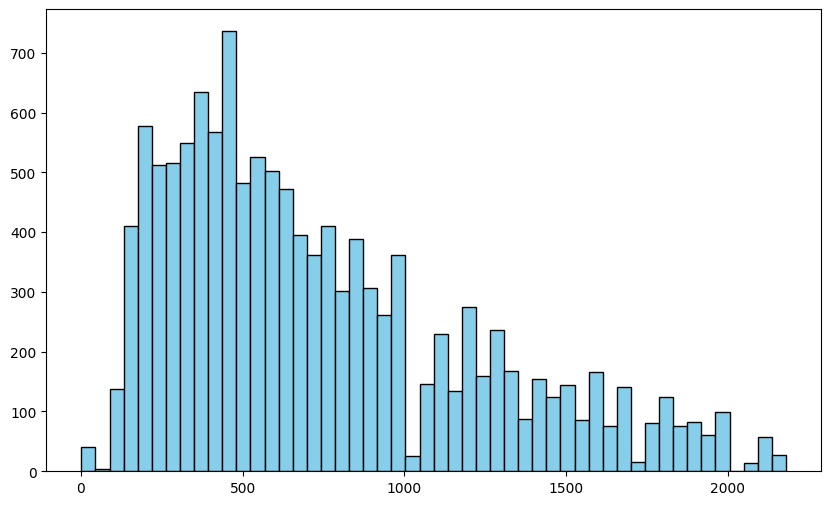

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(np.expm1(y_train) / 1e6, bins=50, color='skyblue', edgecolor='black')
plt.show()

## **3.2 pipeline preprocesamiento**

In [43]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [44]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [45]:
def regression_metrics(y_true, y_pred, n_features: int = None):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    n = len(y_true)
    p = n_features  # por ejemplo X.shape[1]
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1) if n_features is not None else None

    metrics = {
        'MAE': mae.__format__(",.0f"),
        'RMSE': rmse.__format__(",.0f"),
        'R²': round(r2, 4),
        'Adj R²': round(r2_adj, 4) if r2_adj is not None else None,
        'MAPE': round(mape, 4)*100
    }


    print(f"MAE:   ${mae:,.0f} COP")
    print(f"RMSE:  ${rmse:,.0f} COP")
    print(f"R²:    {r2:.4f}")

    return metrics

## **Modelo 1: Random Forest Regressor**

In [46]:
model = RandomForestRegressor(
    n_estimators=300,
    criterion='absolute_error',
    max_depth=None,
    min_samples_split=2,
    random_state=seed,
    n_jobs=-1
)

regressor = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

##### Entrenamiento (modelo base)

In [47]:
regressor.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [48]:

y_train_pred = regressor.predict(X_train)

In [49]:
# metricas en el set de entrenamiento
y_pred_train_real = np.expm1(y_train_pred)
y_train_real = np.expm1(y_train)
rf_train_metrics = regression_metrics(y_train_real, y_pred_train_real, n_features=X_train.shape[1])

MAE:   $49,814,202 COP
RMSE:  $94,743,206 COP
R²:    0.9605


#### Busqueda de hiperparámetros con GridSearchCV

In [50]:
param_grid = {
    'model__n_estimators': [200, 300, 350],
    'model__max_depth': [None, 8],
    "model__criterion": ["squared_error", "absolute_error"],
    "model__min_samples_split": [2, 4]
}

grid_search = GridSearchCV(
    estimator=regressor,
    param_grid=param_grid,
    cv=2,                      
    n_jobs=-1,
    verbose=2,
    scoring='neg_root_mean_squared_error'
)

In [51]:
grid_search.fit(X_val, y_val)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'model__criterion': ['squared_error', 'absolute_error'], 'model__max_depth': [None, 8], 'model__min_samples_split': [2, 4], 'model__n_estimators': [200, 300, ...]}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,2
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


Vemos los resultados del Grid Search

In [52]:
df_grid_search = pd.DataFrame(grid_search.cv_results_)
df_grid_search
params_columns = [col for col in df_grid_search.columns if col.startswith('param_')]
columns_df_grid_search = [ "rank_test_score", "mean_test_score", "std_test_score"] + params_columns
df_grid_search[columns_df_grid_search].sort_values("rank_test_score")

,rank_test_score,mean_test_score,std_test_score,param_model__criterion,param_model__max_depth,param_model__min_samples_split,param_model__n_estimators
19,1,-0.40,0.09,absolute_error,8,2,300
20,2,-0.40,0.09,absolute_error,8,2,350
18,3,-0.40,0.09,absolute_error,8,2,200
22,4,-0.40,0.09,absolute_error,8,4,300
23,5,-0.40,0.09,absolute_error,8,4,350
21,6,-0.40,0.09,absolute_error,8,4,200
17,7,-0.41,0.08,absolute_error,None,4,350
16,8,-0.41,0.08,absolute_error,None,4,300
15,9,-0.41,0.08,absolute_error,None,4,200
14,10,-0.41,0.08,absolute_error,None,2,350


El mejor modelo encontrado

In [53]:
rf_best_model = grid_search.best_estimator_
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'model__criterion': 'absolute_error', 'model__max_depth': 8, 'model__min_samples_split': 2, 'model__n_estimators': 300}


#### Métricas sobre el conjunto de prueba

Finalmente, evaluamos el mejor modelo en el conjunto de prueba y calculamos las métricas de regresión.

In [54]:
y_pred_log = rf_best_model.predict(X_test)
y_pred_real_rf = np.expm1(y_pred_log)
y_test_true = np.expm1(y_test)


rf_test_metrics = regression_metrics(y_test_true, y_pred_real_rf, n_features=X_test.shape[1])

MAE:   $117,873,838 COP
RMSE:  $193,264,685 COP
R²:    0.8350


Revisamos las importancias de las características del modelo Random Forest.

In [55]:
rf_estimator = rf_best_model.named_steps["model"]

onehot_names = (
    rf_best_model.named_steps["preprocessor"]
    .named_transformers_["cat"]
    .named_steps["onehot"]
    .get_feature_names_out(categorical_features)
)

feature_names = numeric_features + list(onehot_names)

feat_imp = (
    pd.Series(rf_estimator.feature_importances_, index=feature_names)
      .sort_values(ascending=False)
)

feat_imp.round(2)

area                          0.68
estrato                       0.16
parqueaderos                  0.03
antiguedad_MAS DE 20 ANOS     0.02
antiguedad_ENTRE 0 Y 5 ANOS   0.02
                              ... 
sector_RESTREPO               0.00
sector_SANTA ISABEL           0.00
sector_SOSIEGO                0.00
sector_VENECIA                0.00
sector_ZONA FRANCA            0.00
Length: 107, dtype: float64

## **Modelo 2: XGBoost Regressor**

In [56]:
from xgboost import XGBRegressor

In [57]:
model_xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

regressor_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model_xgb)
])
regressor_xgb

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


#### Entrenamiento (modelo base)

In [58]:
regressor_xgb.fit(X_train, y_train)

y_pred_log_xgb = regressor_xgb.predict(X_train)
y_pred_train_real_xgb = np.expm1(y_pred_log_xgb)
y_train_real_xgb = np.expm1(y_train)

xg_train_metrics = regression_metrics(y_train_real_xgb, y_pred_train_real_xgb, n_features=X_train.shape[1])

MAE:   $93,563,949 COP
RMSE:  $153,086,663 COP
R²:    0.8969


#### Búsqueda de hiperparámetros con GridSearchCV

In [59]:
param_grid_xgb = {
    'model__max_depth': [None, 4, 8],
    'model__n_estimators': [200, 300, 350],
    'model__learning_rate': [0.05, 0.1]
}

grid_search_xgb = GridSearchCV(
    estimator=regressor_xgb,
    param_grid=param_grid_xgb,
    cv=2,
    n_jobs=-1,
    verbose=2,
    scoring='neg_root_mean_squared_error',
)
grid_search_xgb.fit(X_val, y_val)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'model__learning_rate': [0.05, 0.1], 'model__max_depth': [None, 4, ...], 'model__n_estimators': [200, 300, ...]}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,2
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [60]:
df_grid_search = pd.DataFrame(grid_search_xgb.cv_results_)
params_columns = [col for col in df_grid_search.columns if col.startswith('param_')]
columns_df_grid_search = [ "rank_test_score", "mean_test_score", "std_test_score"] + params_columns
df_grid_search[columns_df_grid_search].sort_values("rank_test_score")

,rank_test_score,mean_test_score,std_test_score,param_model__learning_rate,param_model__max_depth,param_model__n_estimators
3,1,-0.41,0.06,0.05,4,200
4,2,-0.42,0.06,0.05,4,300
5,3,-0.42,0.06,0.05,4,350
12,4,-0.42,0.05,0.10,4,200
13,5,-0.43,0.05,0.10,4,300
14,6,-0.43,0.05,0.10,4,350
0,7,-0.43,0.04,0.05,None,200
9,8,-0.44,0.04,0.10,None,200
1,9,-0.45,0.03,0.05,None,300
10,10,-0.45,0.03,0.10,None,300


In [61]:
print("Mejores parámetros:", grid_search_xgb.best_params_)

xgb_best_model = grid_search_xgb.best_estimator_
xgb_best_model

Mejores parámetros: {'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__n_estimators': 200}


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


#### Métricas sobre el conjunto de prueba

In [62]:
y_pred_log_xgb = xgb_best_model.predict(X_test)

y_test_true = np.expm1(y_test)
y_pred_real_xgb = np.expm1(y_pred_log_xgb)

xgb_test_metrics = regression_metrics(y_test_true, y_pred_real_xgb, n_features=X_test.shape[1])

MAE:   $120,763,679 COP
RMSE:  $202,673,275 COP
R²:    0.8185


In [63]:

xgb_estimator = xgb_best_model.named_steps["model"]

onehot_names = (
    xgb_best_model.named_steps["preprocessor"]
    .named_transformers_["cat"]
    .named_steps["onehot"]
    .get_feature_names_out(categorical_features)
)

feature_names = numeric_features + list(onehot_names)

feat_imp = (
    pd.Series(xgb_estimator.feature_importances_, index=feature_names)
      .sort_values(ascending=False)
)

feat_imp.round(2)

area                          0.19
sector_CENTRO INTERNACIONAL   0.14
estrato                       0.12
parqueaderos                  0.10
sector_CHAPINERO ALTO         0.06
                              ... 
sector_TOBERIN                0.00
localidad_TUNJUELITO          0.00
localidad_SAN CRISTOBAL       0.00
antiguedad_PARA ESTRENAR      0.00
antiguedad_SOBRE PLANOS       0.00
Length: 107, dtype: float32

## **Comparación de modelos**

### --- Métricas de regresión ---

In [64]:
metrics_comparison = pd.DataFrame({
    'Random Forest': rf_test_metrics,
    'XGBoost': xgb_test_metrics
})

Se entrenaron y evaluaron dos modelos de regresión para estimar el precio de venta de apartamentos en Bogotá: Random Forest y XGBoost. En el conjunto de prueba se obtuvieron las siguientes métricas:

In [65]:
metrics_comparison 

,Random Forest,XGBoost
MAE,"117,873,838","120,763,679"
RMSE,"193,264,685","202,673,275"
R²,0.83,0.82
Adj R²,0.83,0.82
MAPE,162.73,157.24




- MAE (Mean Absolute Error): error promedio en pesos. Un MAE de, por ejemplo,  \$117.873.838 COP (RF regressor) significa que, en promedio, el modelo se equivoca esa cantidad al estimar el precio de un apartamento. En este caso, el modelo RF regressor tiene un MAE ligeramente menor que el XGBoost (\$120.763.679 COP), indicando un mejor desempeño en términos de error absoluto promedio.

- RMSE (Root Mean Squared Error): similar al MAE, pero penaliza más fuertemente los errores grandes. Para ambos modelos se tiene un RMSE mayor que el MAE, lo que indica que existen algunos apartamentos con errores de predicción relativamente altos.

- R² (Coeficiente de determinación): porcentaje de la variabilidad del precio que explica el modelo. Un R² de 0,835 implica que el 83,5 % de la variación en los precios se explica por las variables incluidas en el caso de RF, mientras que un 81,8 % en el caso de XGBoost.

- R² ajustado: versión de R² que penaliza el uso de muchas variables irrelevantes. Para ambos modelos, el R² ajustado es cercano al R², lo que sugiere que la mayoría de las variables realmente aportan información.

- MAPE (Mean Absolute Percentage Error): error relativo promedio. El MAPE en ambos modelos es mayor al 100 %, lo que indica que en una proporción importante de observaciones el error absoluto supera el valor real del apartamento. Esto suele ocurrir en problemas inmobiliarios cuando hay alta variabilidad en precios, especialmente en segmentos de lujo o muy económicos.Por esa razón, aunque se reporta el MAPE, la evaluación principal del desempeño del modelo para el negocio se hace con MAE, RMSE y R²

Comparando los dos modelos:

- Random Forest obtiene mejores errores absolutos y mejor capacidad explicativa (menor MAE y RMSE, mayor R² y R² ajustado).

- XGBoost tiene un ligero mejor MAPE, es decir, un error porcentual apenas menor, pero la diferencia es marginal.

Por simplicidad y por su mejor desempeño global en valores absolutos, se selecciona Random Forest como modelo principal de la herramienta, dejando XGBoost como una alternativa competitiva.

### --- Comparar la distribución de valores reales y valores predichos ---

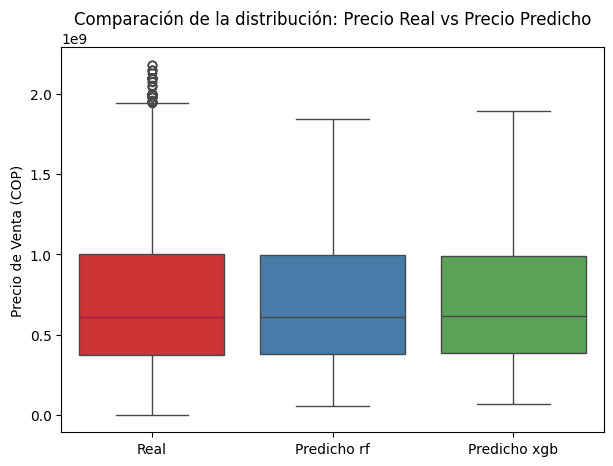

In [66]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

datos_comparacion = pd.DataFrame({
    'Real': y_test_true,
    'Predicho rf': y_pred_real_rf,
    'Predicho xgb': y_pred_real_xgb
})
data_long = pd.melt(datos_comparacion, var_name='Tipo', value_name='Precio de Venta (COP)')

plt.figure(figsize=(7,5))
sns.boxplot(x='Tipo', y='Precio de Venta (COP)', data=data_long, palette='Set1', hue = "Tipo")
plt.title('Comparación de la distribución: Precio Real vs Precio Predicho')
plt.ylabel('Precio de Venta (COP)')
plt.xlabel('')
plt.show()

In [67]:
print("Descripción estadística de los valores reales y predichos (en millones de COP):")
print(datos_comparacion.describe().round(2)/1e6)

Descripción estadística de los valores reales y predichos (en millones de COP):
         Real  Predicho rf  Predicho xgb
count    0.00         0.00          0.00
mean   741.93       718.16        707.46
std    475.83       419.90        406.16
min      1.00        54.77         66.19
25%    372.20       378.17        386.61
50%    610.00       606.74        615.58
75%   1000.00       997.74        990.07
max   2180.00      1843.85       1891.77


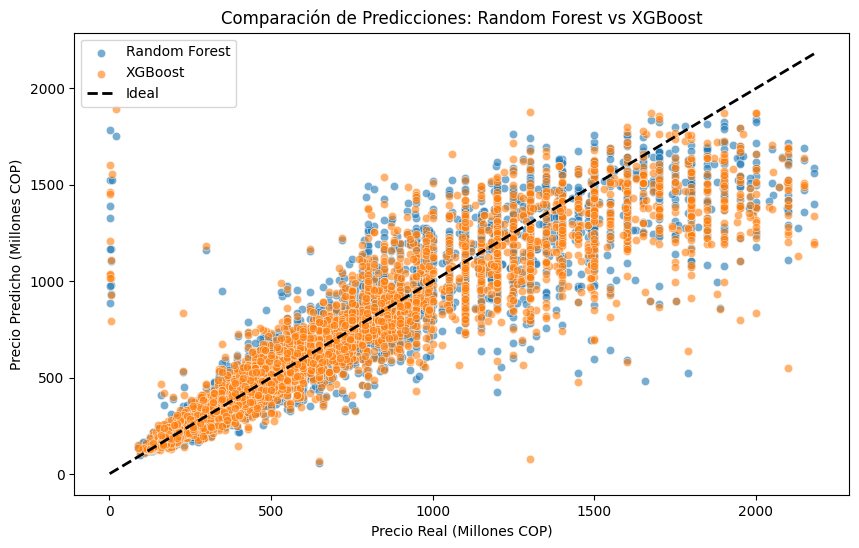

In [155]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_true/1e6, y=y_pred_real_rf/1e6, label='Random Forest', alpha=0.6)
sns.scatterplot(x=y_test_true/1e6, y=y_pred_real_xgb/1e6, label='XGBoost', alpha=0.6)
plt.plot([y_test_true.min()/1e6, y_test_true.max()/1e6], [y_test_true.min()/1e6, y_test_true.max()/1e6], 'k--', lw=2, label='Ideal')
plt.xlabel('Precio Real (Millones COP)')
plt.ylabel('Precio Predicho (Millones COP)')
plt.title('Comparación de Predicciones: Random Forest vs XGBoost')
plt.legend()
plt.show()

La mayoría de los puntos se concentran alrededor de la línea ideal, lo que indica que los modelos capturan adecuadamente la relación entre las variables explicativas y el precio. Se observa, sin embargo, una mayor dispersión a precios muy altos o muy bajos, donde los modelos tienden a subestimar o sobreestimar algunos apartamentos, lo cual es esperable en segmentos con menor cantidad de datos y mayor heterogeneidad.

### ---- Comparación de residuos de los dos modelos ----


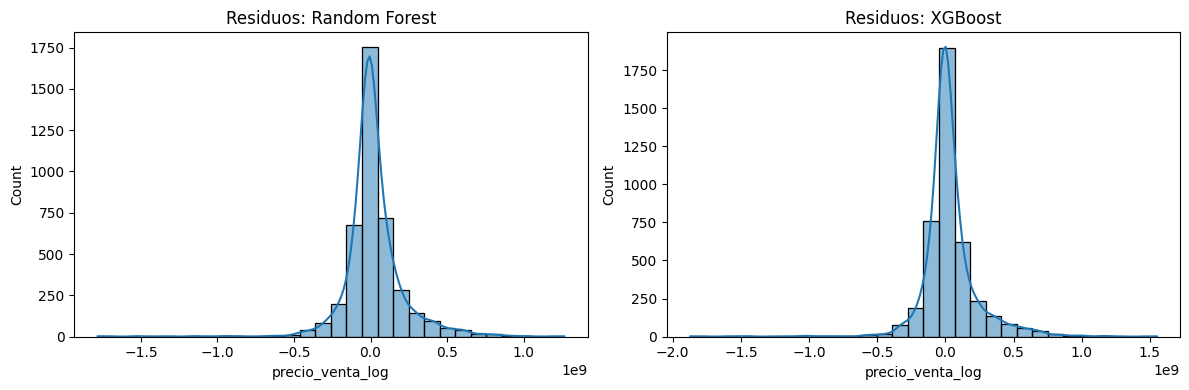

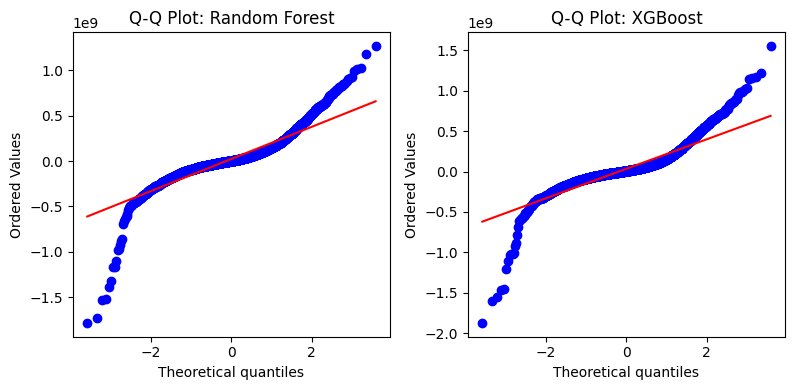

In [69]:
residuos_m1 = y_test_true - y_pred_real_rf
residuos_m2 = y_test_true - y_pred_real_xgb

plt.figure(figsize=(12,4))
for i, (res, modelo) in enumerate(zip(
    [residuos_m1, residuos_m2],
    ['Random Forest', 'XGBoost'])):
    plt.subplot(1,2,i+1)
    sns.histplot(res, bins=30, kde=True)
    plt.title(f'Residuos: {modelo}')
plt.tight_layout()
plt.show()

# Q-Q plots
import scipy.stats as stats
plt.figure(figsize=(12,4))
for i, (res, modelo) in enumerate(zip(
    [residuos_m1, residuos_m2],
    ['Random Forest', 'XGBoost'])):
    plt.subplot(1,3,i+1)
    stats.probplot(res, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot: {modelo}')
plt.tight_layout()
plt.show()

En la Figura se presentan los Q–Q plots de los residuos de los modelos Random Forest (izquierda) y XGBoost (derecha), comparados contra una distribución normal teórica. En ambos casos, los puntos se alinean razonablemente con la recta roja en la zona central, lo que indica que, para la mayoría de los apartamentos, los errores de predicción se distribuyen de forma relativamente simétrica alrededor de cero y no presentan desviaciones extremas.

Sin embargo, en las colas de la distribución (valores muy altos y muy bajos) los puntos se separan claramente de la recta, formando una curva en “S”, lo que sugiere la presencia de colas más pesadas que las de una normal y, por tanto, de varios casos con errores muy grandes (outliers). Esto es consistente con la existencia de apartamentos de precios muy bajos o muy altos donde el modelo se equivoca más. Aunque en modelos basados en árboles no es requisito que los residuos sigan una normal, estos Q–Q plots evidencian oportunidades de mejora, por ejemplo, en el tratamiento de outliers o en la construcción de modelos específicos para ciertos segmentos del mercado.


# 4. Interpretabilidad

In [70]:
import shap
import lime
import lime.lime_tabular

In [156]:
y_test_real = np.expm1(y_test)
median_price = y_test_real.median()

median_idx = (y_test_real - median_price).abs().idxmin()
minimum_idx = y_test_real.idxmin()
maximum_idx = y_test_real.idxmax()

indices = [minimum_idx, median_idx, maximum_idx]

print("Seleccionando apartamentos para explicar:")
for i, idx in enumerate(indices):
    actual_price = y_test_real.loc[idx]
    print(f"{i+1}. Apartamento (índice {idx}): Precio real = ${actual_price:,.0f} COP")


Seleccionando apartamentos para explicar:
1. Apartamento (índice 37696): Precio real = $1,000,000 COP
2. Apartamento (índice 29751): Precio real = $610,000,000 COP
3. Apartamento (índice 42210): Precio real = $2,180,000,000 COP


### LIME

In [ ]:
X_train_transformed = rf_best_model.named_steps['preprocessor'].transform(X_train)

# Get feature names after preprocessing
feature_names_lime = (
    numeric_features + 
    list(rf_best_model.named_steps['preprocessor']
         .named_transformers_['cat']
         .named_steps['onehot']
         .get_feature_names_out(categorical_features))
)


explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_transformed,
    feature_names=feature_names_lime,
    class_names=['precio_venta'],
    mode='regression',
    random_state=np.random.RandomState(seed)
)

In [ ]:
# Create a prediction function for LIME
# Since we're passing preprocessed data, we only need the model step
def predict_fn(X_preprocessed):
    """
    Prediction function for LIME that works with already preprocessed data
    """
    return rf_best_model.named_steps['model'].predict(X_preprocessed)


# Función para plotear explicaciones LIME
def plot_lime_explanation(lime_values, num_example, actual_real, predicted_real):

    fig, axes = plt.subplots(1, 1, figsize=(12, 5))
   
    features = [item[0] for item in lime_values]
    importances = [item[1] for item in lime_values]

    lime_importances = pd.Series(importances, index=features).sort_values()
    # borrar cero
    lime_importances = lime_importances[lime_importances != 0]
    features = lime_importances.index.tolist()
    importances = lime_importances.values.tolist()

    
    colors = ['green' if x > 0 else 'red' for x in importances]
    
    axes.barh(features, importances, color=colors, alpha=0.7)
    axes.set_xlabel('Contribución al precio (escala log)', fontsize=12)
    axes.set_title(
        f'LIME Explanation - Apartamento {num_example}\n'
        f'Precio Real: ${actual_real:,.0f} | Predicción: ${predicted_real:,.0f} | Error: ${abs(actual_real-predicted_real):,.0f}',
        fontsize=12, fontweight='bold'
    )
    axes.axvline(x=0, color='black', linestyle='--', linewidth=1)
    axes.grid(axis='x', alpha=0.3)

    plt.tight_layout()
    plt.show()

def plot_and_calculate_lime_explanation(idx, num_example, X_test_transformed_lime, y_test_real):
    position = X_test.index.get_loc(idx)
    
    instance_transformed = X_test_transformed_lime[position]
    
    lime_exp = explainer.explain_instance(
        data_row=instance_transformed,
        predict_fn=predict_fn,
        num_features=15,
        num_samples=8000
    )
    
    lime_values = lime_exp.as_list()
    
    actual_price = y_test_real.loc[idx]
    instance_original = X_test.loc[[idx]]
    display(instance_original.T)
    predicted_log = rf_best_model.predict(instance_original)[0]
    predicted_price = np.expm1(predicted_log)

    plot_lime_explanation(lime_values, num_example, actual_price, predicted_price)

In [ ]:
X_test_transformed_lime = rf_best_model.named_steps['preprocessor'].transform(X_test)
y_test_real = np.expm1(y_test)

#### LIME Apartamento 1

,37696
area,170.00
habitaciones,3.00
banos,3.00
parqueaderos,2.00
estrato,6.00
antiguedad,MAS DE 20 ANOS
sector,SANTA BARBARA
localidad,USAQUEN


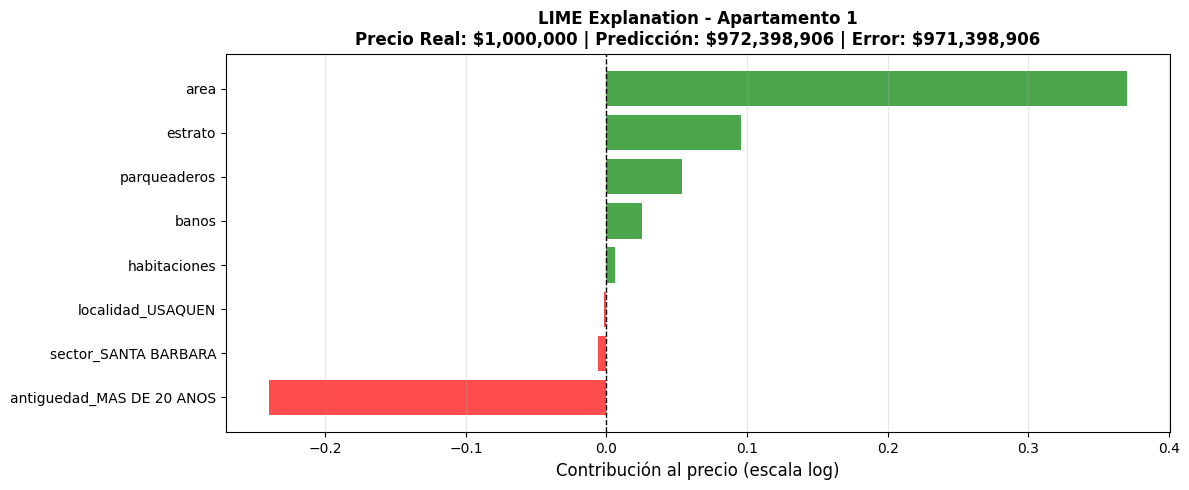

In [ ]:
plot_and_calculate_lime_explanation(indices[0], 1, X_test_transformed_lime, y_test_real)



* **Precio real:** $1.000.000
* **Predicción modelo:** $860.551.444 (lo sobreestima brutalmente)
* LIME muestra que:

  * **Área** es la barra verde más grande → el modelo interpreta que este apartamento tiene un área que empuja mucho el precio hacia arriba.
  * **Estrato, parqueaderos, banos, habitaciones** también aparecen en verde → refuerzan la idea de que debería ser un apartamento caro.
  * **Antigüedad_MÁS DE 20 AÑOS** aparece como una barra roja muy grande → es la característica que más le baja el precio al modelo.
* Interpretación: para el modelo, casi todo apunta a que este debería ser un apartamento **muy caro** (estrato, área, parqueaderos), y la antigüedad lo “abarata” principalmente. Pero en la realidad el precio es bajísimo, por eso la sobrestimación es enorme: este es un caso donde la combinación de variables no es típica en el entrenamiento (posible outlier o dato raro).



#### LIME Apartamento 2

,29751
area,110.00
habitaciones,3.00
banos,3.00
parqueaderos,2.00
estrato,5.00
antiguedad,MAS DE 20 ANOS
sector,COLINA Y ALREDEDORES
localidad,SUBA


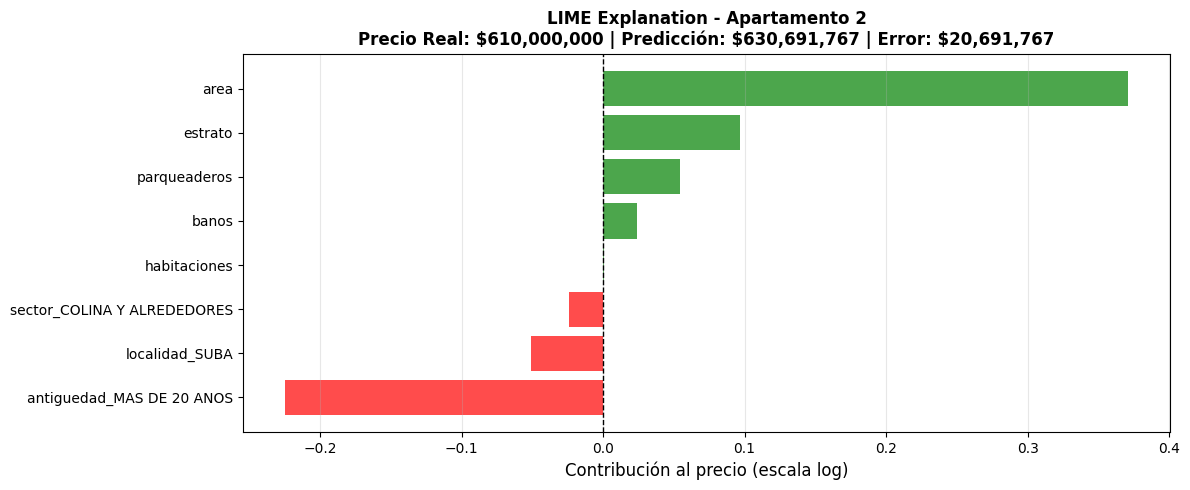

In [ ]:

plot_and_calculate_lime_explanation(indices[1], 2, X_test_transformed_lime, y_test_real)

* **Precio real:** $610.000.000
* **Predicción modelo:** $630.691.767 (lo sobreestima, pero el error ya es moderado)
* LIME indica que:

  * **Área** vuelve a ser la principal barra verde: más área → más precio.
  * **Estrato**, **parqueaderos**, **banos**, también empujan el precio hacia arriba.
  * De nuevo, **Antigüedad_MÁS DE 20 AÑOS** aparece en rojo y con bastante peso → el modelo castiga fuerte los apartamentos viejos.
* Interpretación: aquí el modelo está “razonando” de forma consistente: ve un apartamento con buen tamaño, estrato razonable y parqueaderos lo cual asocia con precios altos, pero le resta bastante valor por ser muy antiguo y mas levemente por su ubicación. El resultado es una predicción **un poco por encima del precio real**, pero dentro de un rango más esperable.


#### LIME Apartamento 3

,42210
area,240.00
habitaciones,3.00
banos,4.00
parqueaderos,2.00
estrato,6.00
antiguedad,REMODELADO
sector,CHICO
localidad,CHAPINERO


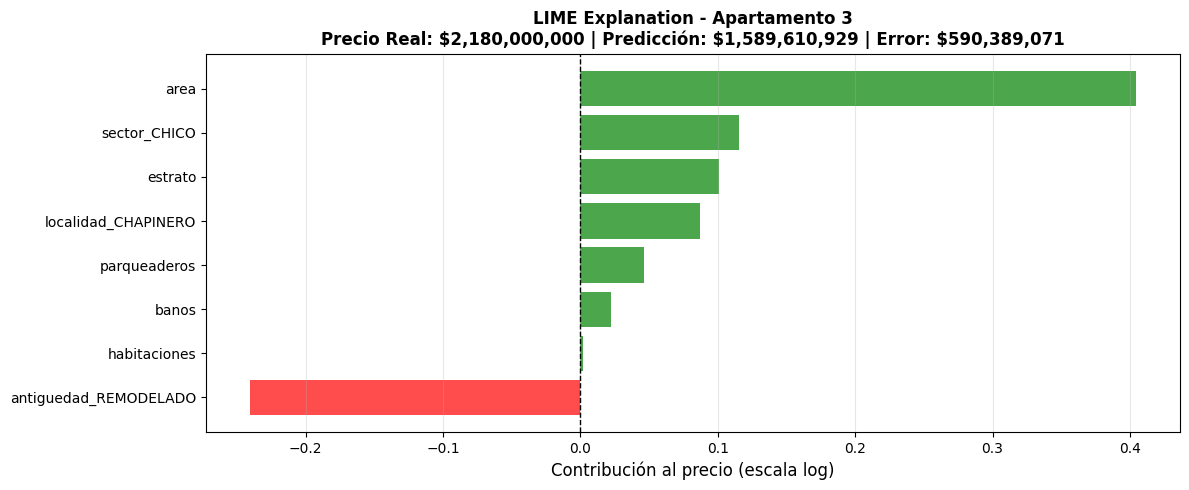

In [ ]:

plot_and_calculate_lime_explanation(indices[2], 3, X_test_transformed_lime, y_test_real)


* **Precio real:** $2.180.000.000
* **Predicción modelo:** $1.589.610.929 (lo subestima en más de $560M)
* LIME muestra:

  * **Área** es otra vez la barra verde dominante → el modelo lo entiende como un apartamento grande.
  * **Sector_CHICO**, **localidad_CHAPINERO**, **estrato** y **parqueaderos** también están en verde y con bastante contribución → el modelo reconoce que está en una de las zonas más caras y con buenas características.
  * **Antigüedad_REMODELADO** aparece en rojo → para el modelo, “remodelado” baja un poco el precio relativo a “nuevo” (o está aprendiendo un patrón raro en los datos).
* Interpretación: el modelo sí identifica que este es un apartamento de **alto nivel (Chicó–Chapinero, estrato alto, varios parqueaderos, área grande)** y por eso la predicción es alta; sin embargo, **no alcanza el nivel del precio real** y termina subestimando. Esto sugiere que los apartamentos muy lujosos en zonas top todavía están infra-representados o mal calibrados en el entrenamiento.


En resumen, en los tres casos LIME confirma que el modelo se guía sobre todo por **área, estrato, parqueaderos**, y que la **antigüedad** (viejo o remodelado) suele ser la variable que más le baja el precio. Los errores grandes aparecen justo en combinaciones poco frecuentes: apartamentos muy baratos en zonas/condiciones que el modelo asocia con caro (caso 1) o apartamentos de lujo extremos (caso 3).


### SHAP (SHapley Additive exPlanations)

In [ ]:
trained_model = rf_best_model.named_steps['model']

X_test_transformed = rf_best_model.named_steps['preprocessor'].transform(X_test)

if hasattr(X_test_transformed, 'toarray'):
    X_test_transformed = X_test_transformed.toarray()

explainer_shap = shap.TreeExplainer(trained_model)

sample_size = min(1000, X_test_transformed.shape[0])
shap_values = explainer_shap.shap_values(X_test_transformed[:sample_size])

print(f"Calculated SHAP values for {sample_size} test samples")
print(f"SHAP values shape: {shap_values.shape}")

Calculated SHAP values for 1000 test samples
SHAP values shape: (1000, 107)


In [ ]:
feature_names = (
    numeric_features + 
    list(rf_best_model.named_steps['preprocessor']
         .named_transformers_['cat']
         .named_steps['onehot']
         .get_feature_names_out(categorical_features))
)

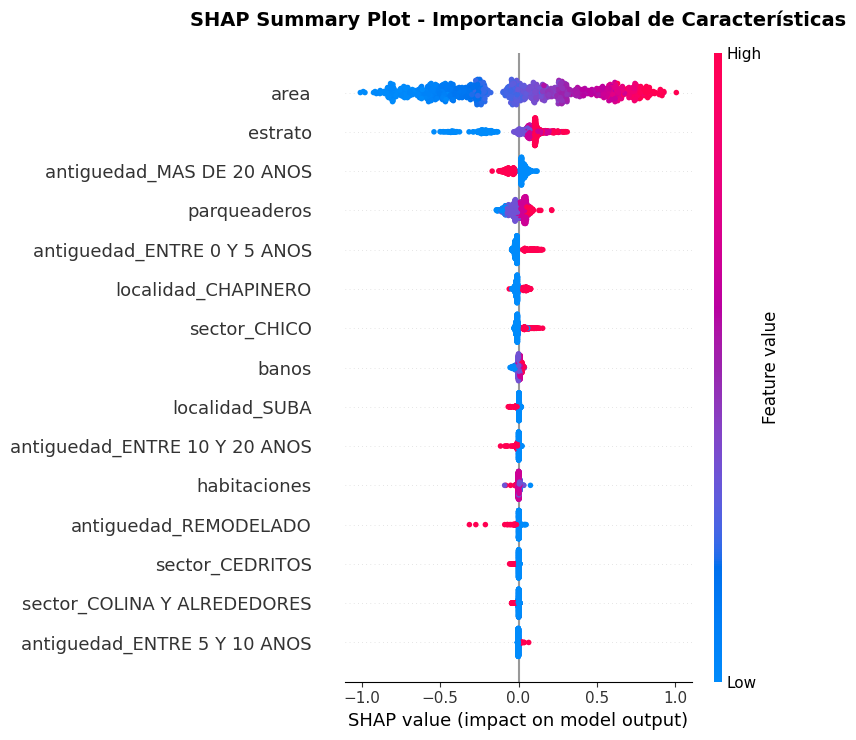

In [ ]:
# SHAP Summary Plot - Shows feature importance across all predictions
plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_values[:sample_size], 
    X_test_transformed[:sample_size],
    feature_names=feature_names,
    max_display=15,
    show=False
)
plt.title('SHAP Summary Plot - Importancia Global de Características', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()




El SHAP Summary Plot detalla cómo varía el impacto en la predicción según el valor específico de cada característica. En este gráfico, cada punto representa un apartamento y el eje X corresponde al valor SHAP (positivo cuando la característica aumenta el precio predicho y negativo cuando lo disminuye), mientras que el color indica si el valor de la característica es bajo (azul) o alto (rojo). Se observa que áreas grandes y estratos altos se asocian sistemáticamente con valores SHAP positivos, incrementando el precio estimado, mientras que áreas pequeñas, estratos bajos y antigüedad mayor a 20 años tienden a generar valores SHAP negativos, reduciendo el valor predicho. Estos resultados confirman que el modelo fundamenta sus decisiones principalmente en el tamaño del apartamento, el estrato y la antigüedad, complementados por el número de parqueaderos y la zona de la ciudad.


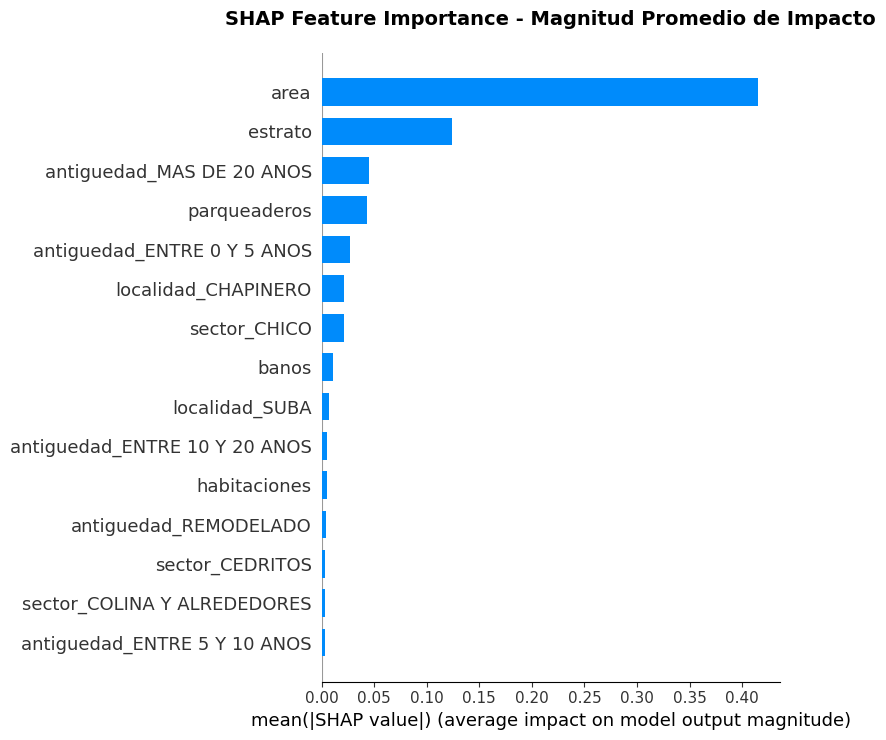

In [ ]:
# SHAP Bar Plot - Average importance
plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_values[:sample_size], 
    X_test_transformed[:sample_size],
    feature_names=feature_names,
    plot_type="bar",
    max_display=15,
    show=False
)
plt.title('SHAP Feature Importance - Magnitud Promedio de Impacto', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


La grafica muestra la magnitud promedio del impacto de cada variable sobre la predicción (`mean(|SHAP value|)`), evidenciando que el área es, por amplio margen, la característica más influyente en el modelo, seguida del estrato, la antigüedad mayor a 20 años y el número de parqueaderos. Variables asociadas a la ubicación (localidad y sector), el número de baños y las habitaciones aportan ajustes adicionales, aunque con una magnitud de impacto menor.

#### Shap value para los ejemplos seleccionados

In [ ]:
def calculate_and_plot_shap_value_for_example(idx, num_example, shap_values, X_test_transformed, y_test_real):
    plt.figure(figsize=(12, 8))

    position = X_test.index.get_loc(idx)
    
    instance_transformed = X_test_transformed[position]
    shap_values_instance = (
        shap_values[position] 
        if position < sample_size 
        else explainer_shap.shap_values(instance_transformed.reshape(1, -1))[0]
    )
    
    actual_price = y_test_real.loc[idx]
    instance_original = X_test.loc[[idx]]
    display(instance_original.T)
    predicted_log = rf_best_model.predict(instance_original)[0]
    predicted_price = np.expm1(predicted_log)
    
    explanation = shap.Explanation(
        values=shap_values_instance,
        base_values=explainer_shap.expected_value,
        data=instance_transformed,
        feature_names=feature_names
    )
    
    shap.plots.waterfall(
        explanation, 
        max_display=12,
        show=False
    )

    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    plt.title(
        f'SHAP Waterfall - Apartamento {num_example}\n'
        f'Precio Real: ${actual_price:,.0f} | Predicción: ${predicted_price:,.0f}',
        fontsize=14,
        fontweight='bold',
        pad=15
    )

    plt.tight_layout()
    plt.show()

Los siguientes graficos son una explicación local del modelo para un apartamento de ejemplo usando SHAP. Las barras rojas son características que aumentan la predicción respecto al promedio, y las azules son las que la disminuyen. La suma de todas esas contribuciones es la diferencia entre E[f(X)] y f(x). E[f(X)] es el valor base del modelo, es decir, es el valor promedio de la predicción (en escala log) si no supiéramos nada del apartamento. Por su parte, f(x) es la predicción del modelo para el apartamento de ejemplo en escala log.


,37696
area,170.00
habitaciones,3.00
banos,3.00
parqueaderos,2.00
estrato,6.00
antiguedad,MAS DE 20 ANOS
sector,SANTA BARBARA
localidad,USAQUEN


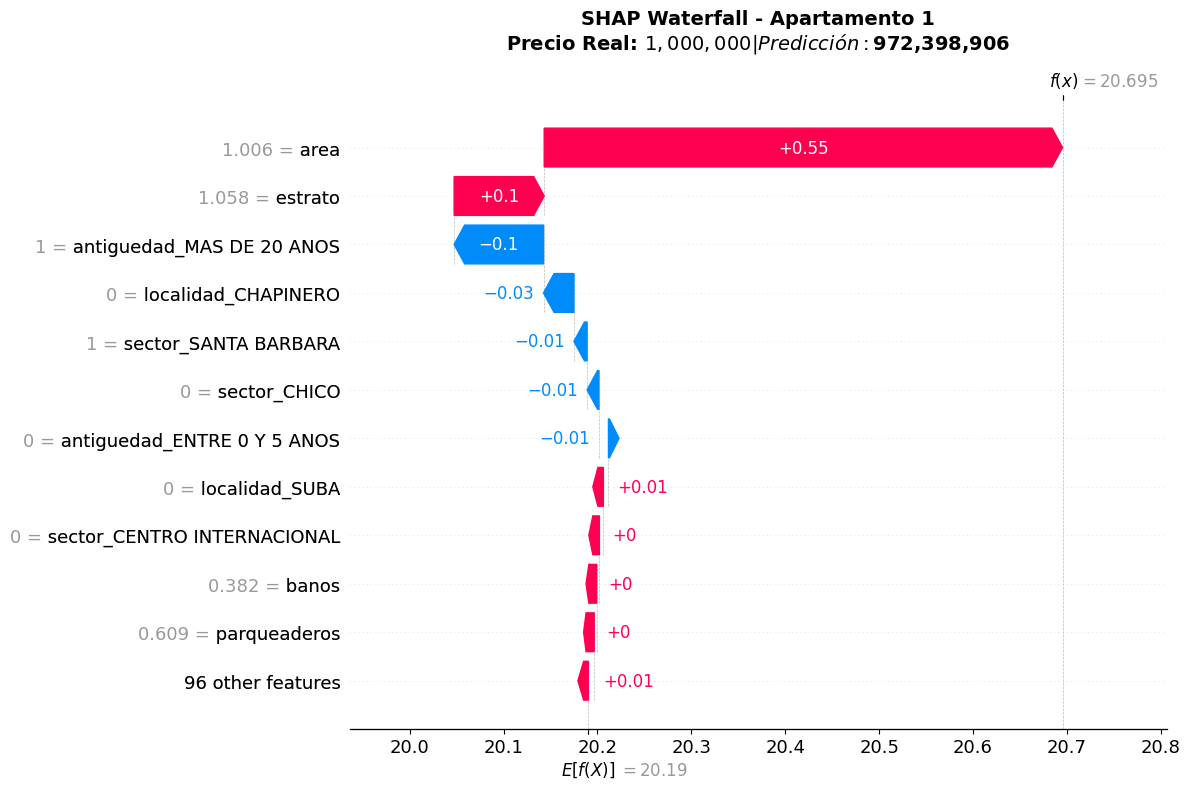

In [ ]:
indice = indices[0]
example_num = 1
calculate_and_plot_shap_value_for_example(indice, example_num, shap_values, X_test_transformed, y_test_real)

La variable con mayor impacto es area (barra roja grande, +0.55), indicando que en este apartamento el área es alta frente al promedio y por eso empuja fuertemente el precio hacia arriba el modelo. El estrato también aporta de forma positiva (+0.1), reforzando la idea de que el apartamento está en un nivel socioeconómico alto. La antigüedad "MÁS DE 20 AÑOS" aparece en azul (–0.1) ya que el modelo resta valor por ser un apartamento viejo.

,29751
area,110.00
habitaciones,3.00
banos,3.00
parqueaderos,2.00
estrato,5.00
antiguedad,MAS DE 20 ANOS
sector,COLINA Y ALREDEDORES
localidad,SUBA


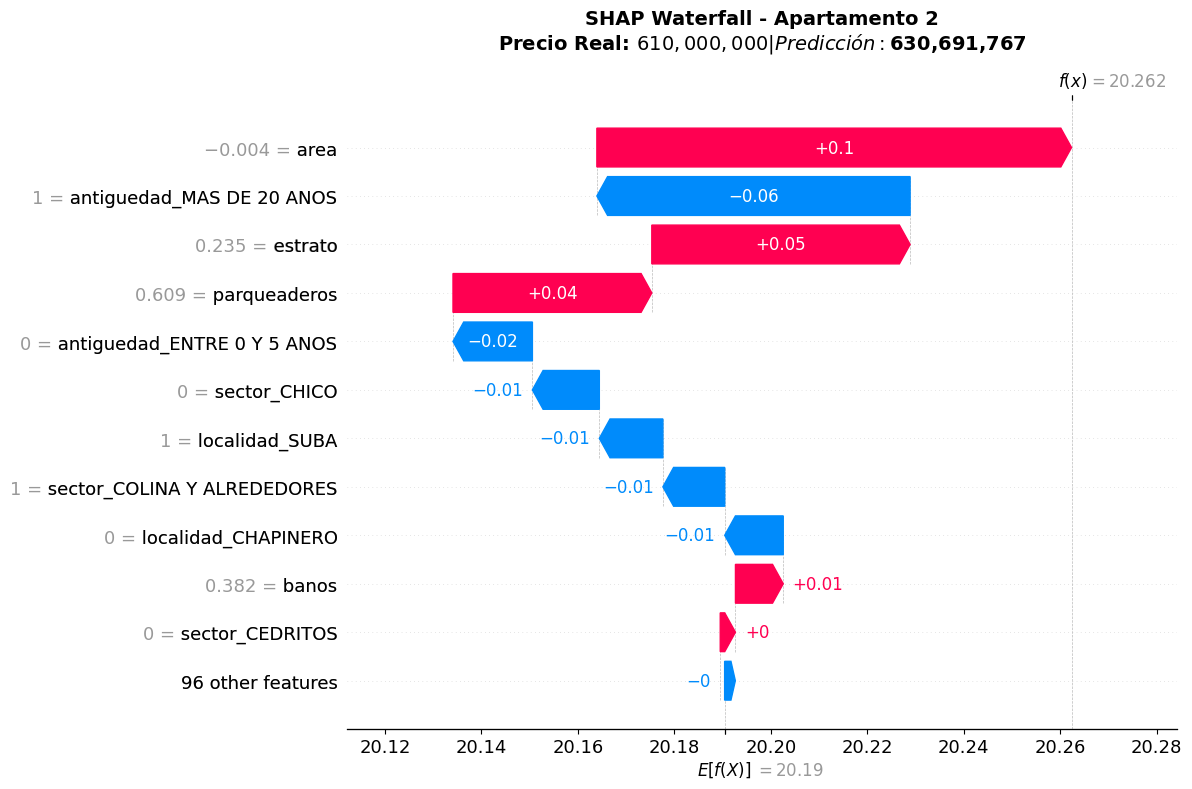

In [ ]:
indice = indices[1]
example_num = 2
calculate_and_plot_shap_value_for_example(indice, example_num, shap_values, X_test_transformed, y_test_real)

Comportamiento similar al del Apartamento 1, pero con una predicción más alta. Aquí el área también es la variable dominante que empuja el precio hacia arriba, seguida por el estrato y el número de parqueaderos. La antigüedad de más de 20 años resta valor. Que este en SUBA en el sector COLINA Y ALREDEDORES también le resta un poco de valor según el modelo. Aparentemente, el modelo penaliza apartamentos que no estén en la localidad de CHAPINERO.

,42210
area,240.00
habitaciones,3.00
banos,4.00
parqueaderos,2.00
estrato,6.00
antiguedad,REMODELADO
sector,CHICO
localidad,CHAPINERO


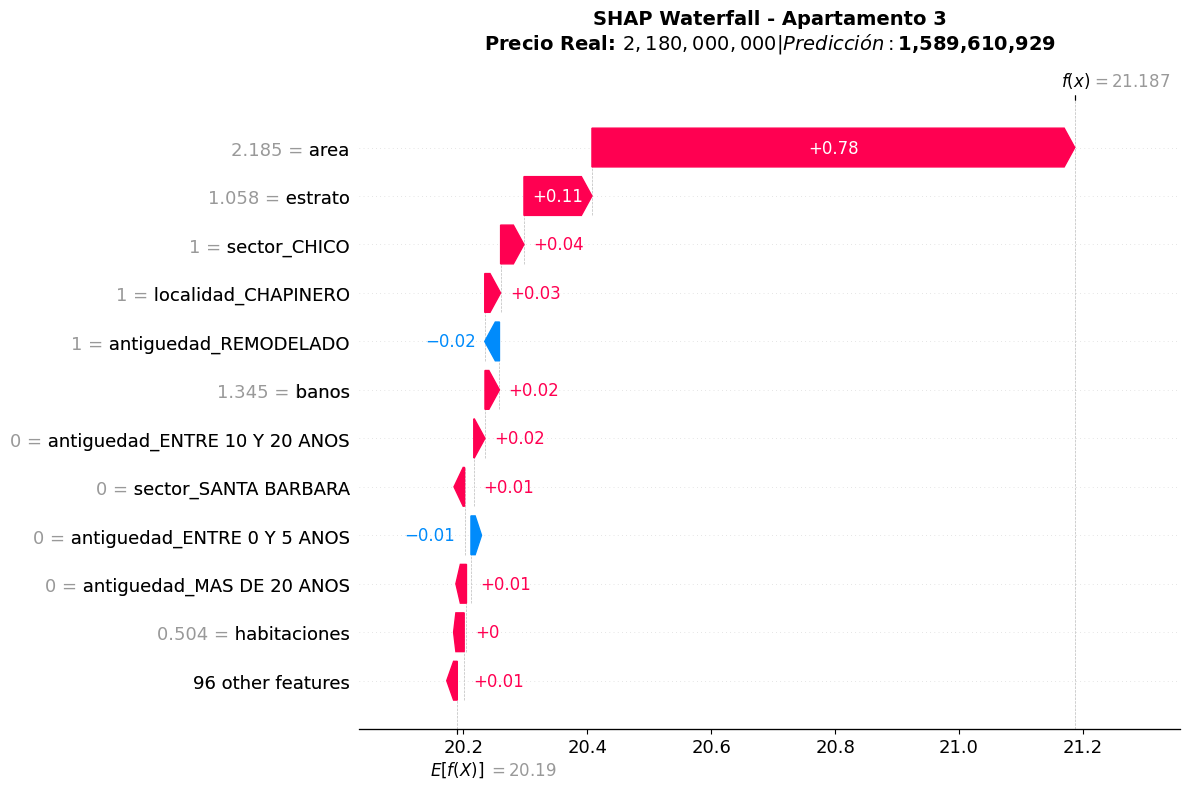

In [ ]:
indice = indices[2]
example_num = 3
calculate_and_plot_shap_value_for_example(indice, example_num, shap_values, X_test_transformed, y_test_real)

El modelo valora positivamente apartamentos en CHAPINERO y en sectores como CHICO y SANTA BARBARA, que son zonas de alto nivel socioeconómico. En este caso, el área vuelve a ser la variable dominante que impulsa el precio hacia arriba, seguida por el estrato. La antigüedad "REMODELADO" resta un poco de valor según el modelo.

# 5. Generación de valor








Supuestos iniciales
* Sin modelo: el perito tarda **6 h** por estimación.
* Con modelo: el perito tarda **1 h** por estimación (revisión rápida).
* Salario del perito: **9.500 COP/h**.
* HabitAlpes puede revisar hasta **500 apartamentos/mes**.
* Si la estimación *sub-valora* el apartamento en ≥ 20 M COP, el cliente exige avalúo presencial. Para parametrizar el modelo necesitamos decidir cuánto cuesta ese avalúo presencial. Se asume que un avalúo presencial agrega **3 h** extra de trabajo del perito `cost_mistake_horas = 3 h`.
* Se asume que el costo por predicción del modelo es de **200 COP** (despliegue serverless en la nube para ahorrar costos fijos).




In [135]:
# Parámetros del problema
salario_hora = 9_500          # COP/hora
horas_sin_modelo = 6          # horas de perito sin modelo
horas_con_modelo = 1          # horas de perito con modelo (alta confianza)
horas_aval_presencial = 3     # horas extra si el modelo se equivoca (subestima)
conf_split = 0.9              # proporción de predicciones de alta confianza
apartamentos_mes = 500        # capacidad mensual

# costo de realizar una predicción del modelo
costo_prediccion = 200 # COP por predicción, despliegue serverless en la nube para ahorrar costos fijos

# Derivados en COP
value = (horas_sin_modelo - horas_con_modelo) * salario_hora  - costo_prediccion    # valor ahorrado por acierto
cost_mistake = horas_aval_presencial * salario_hora               # costo de un error de alta confianza
cost_manual = horas_sin_modelo * salario_hora                     # costo de revisar manualmente (baja confianza)

print(f"value = {value:,.0f} COP")
print(f"cost_mistake = {cost_mistake:,.0f} COP")
print(f"cost_manual = {cost_manual:,.0f} COP")


value = 47,300 COP
cost_mistake = 28,500 COP
cost_manual = 57,000 COP


Si la estimación sub-valora el apartamento en ≥ 20 M COP, el cliente exige avalúo presencial.

In [136]:
# si se subvalora la propiedad, el error es negativo
# si se sobrevalora la propiedad, el error es positivo
error = np.expm1(y_test) - y_pred_real_rf

# apartamentos subvaluados por más de 20 millones de COP
sub_20m = error < -20_000_000
predicciones_sub_20m = y_pred_real_rf[sub_20m]
porcentaje_sub_20m = len(predicciones_sub_20m) / len(y_test) * 100
print(f"Número de apartamentos subvaluados por más de 20 millones de COP: {len(predicciones_sub_20m)}, porcentaje: {porcentaje_sub_20m:.2f}%")

#  proporción de predicciones con error aceptable (menos de 20 millones de COP)
conf_acc = 100 - porcentaje_sub_20m
print(f"Confianza en el modelo (predicciones con error menor a 20 millones de COP): {conf_acc:.2f}%")


Número de apartamentos subvaluados por más de 20 millones de COP: 1623, porcentaje: 39.12%
Confianza en el modelo (predicciones con error menor a 20 millones de COP): 60.88%


**Retorno por estimación dado un nivel de confianza**

![ganancia.png](./figs/ganancia2.png)
tomado de referencia de las diapositivas: Linna, E (2020). Return on Investment for Machine Learning. Medium. 
(https://medium.com/data-science/return-on-investment-for-machine-learning-1a0c431509e)

In [157]:

def retorno_por_estimacion(conf_acc,
                           value=value,
                           cost_mistake=cost_mistake,
                           cost_manual=cost_manual,
                           conf_split=conf_split):
    """
    conf_acc: exactitud en el bracket de alta confianza (0–1)

    retorna: ganancia esperada (COP) por estimación
    """
    return (value - (1 - conf_acc) * cost_mistake) * conf_split \
           - (1 - conf_split) * cost_manual


# Retorno esperado por estimación 
ret_est = retorno_por_estimacion(conf_acc)
print(f"\nRetorno esperado por estimación (conf_acc={conf_acc:.2f}): {ret_est:,.0f} COP")

# Ganancia mensual esperada
ret_mensual = ret_est * apartamentos_mes
print(f"Retorno esperado mensual: {ret_mensual:,.0f} COP")


Retorno esperado por estimación (conf_acc=60.88): 1,572,847 COP
Retorno esperado mensual: 786,423,449 COP


**Inversión en el proyecto**
* Costo de desarrollo del modelo (data scientist): **$6,888,000 COP**.
* ML Engineer / MLOps: **$6,888,000 COP**.
* Product Owner / experto negocio:	**$3,600,000 COP**.
* Infraestructura: **$500,000 COP**.


In [140]:
# 4) Inversión del proyecto
investment_breakdown = pd.DataFrame([
    {'Concepto': 'Científico/a de datos senior', 'Horas': 24*10, 'Tarifa_hora': 28_700, 'Subtotal': np.nan},
    {'Concepto': 'ML Engineer / MLOps', 'Horas': 24*10, 'Tarifa_hora': 28_700, 'Subtotal': np.nan},
    {'Concepto': 'Product Owner / experto negocio', 'Horas': 24*5, 'Tarifa_hora': 30_000, 'Subtotal': np.nan},
    {'Concepto': 'Infraestructura', 'Horas': 0, 'Tarifa_hora': 0, 'Subtotal': 500_000}
])

investment_breakdown['Subtotal'] = investment_breakdown['Subtotal'].fillna(0)
investment_breakdown['Subtotal'] += investment_breakdown['Horas'] * investment_breakdown['Tarifa_hora']
total_investment = investment_breakdown['Subtotal'].sum()
display(investment_breakdown.style.format({
    'Horas': '{:,.0f}',
    'Tarifa_hora': '${:,.0f} COP',
    'Subtotal': '${:,.0f} COP'
}))
print(f"Inversión total del proyecto: ${total_investment:,.0f} COP")

,Concepto,Horas,Tarifa_hora,Subtotal
0,Científico/a de datos senior,240,"$28,700 COP","$6,888,000 COP"
1,ML Engineer / MLOps,240,"$28,700 COP","$6,888,000 COP"
2,Product Owner / experto negocio,120,"$30,000 COP","$3,600,000 COP"
3,Infraestructura,0,$0 COP,"$500,000 COP"


Inversión total del proyecto: $17,876,000 COP


**Punto de equilibrio dado un costo total del proyecto del modelo**

In [ ]:

if ret_est > 0:
    estimaciones_break_even =  total_investment / ret_est
    meses_break_even = estimaciones_break_even / apartamentos_mes
    print(f"\nEstimaciones necesarias para recuperar la inversión: {estimaciones_break_even:,.0f}")
    print(f"Meses para llegar a break-even: {meses_break_even:,.1f}")
else:
    print("\nCon estos parámetros el modelo nunca recupera la inversión (retorno <= 0).")



Estimaciones necesarias para recuperar la inversión: 662
Meses para llegar a break-even: 1.3


**Estimación del error dada categorias de precios**

*resumen del desempeño del modelo por rango de precio* (“Baratas”, “Medias”, “Caras”).

In [144]:
# 1) Estadísticos de precio 
price_summary = (
    df_model['precio_venta']
    .describe(percentiles=[0.25, 0.5, 0.75, 0.9])
    .rename({
        'count': 'conteo',
        'mean': 'media',
        'std': 'desviacion',
        'min': 'minimo',
        '25%': 'q1',
        '50%': 'mediana',
        '75%': 'q3',
        '90%': 'p90',
        'max': 'maximo'
    })
    .to_frame(name='COP'))

price_summary.round(2).style.format("{:,.2f}")

,COP
conteo,"20,743.00"
media,"738,400,530.75"
desviacion,"473,370,517.87"
minimo,"1,000,000.00"
q1,"370,000,000.00"
mediana,"615,000,000.00"
q3,"990,000,000.00"
p90,"1,480,000,000.00"
maximo,"2,180,000,000.00"


In [154]:
# calculo de error por viviendas baratas, medias y caras
bins = [0, price_summary.loc['q1', 'COP'], price_summary.loc['q3', 'COP'], price_summary.loc['maximo', 'COP'] + 1]
labels = ['Baratas', 'Medias', 'Caras']
df_test_results = X_test.copy()
df_test_results['precio_venta_real'] = y_test_true
df_test_results['categoria_precio'] = pd.cut(df_test_results['precio_venta_real'], bins=bins, labels=labels, right=False)
df_test_results['precio_venta_predicho'] = y_pred_real_rf
df_test_results['error_absoluto'] = np.abs(df_test_results['precio_venta_real'] - df_test_results['precio_venta_predicho'])
# error subestimacion
filter_subestimacion = df_test_results['precio_venta_predicho'] < df_test_results['precio_venta_real']
df_test_results['error_subestimacion'] = np.where(
    filter_subestimacion,
    df_test_results['precio_venta_real'] - df_test_results['precio_venta_predicho'],
    0
)
# error sobreestimacion
df_test_results['error_sobreestimacion'] = np.where(
    ~filter_subestimacion,
    df_test_results['precio_venta_predicho'] - df_test_results['precio_venta_real'],
    0
)
df_test_results['error_porcentual'] = df_test_results['error_absoluto'] / df_test_results['precio_venta_real'] * 100
error_by_category = (
    df_test_results
    .groupby('categoria_precio')
    .agg(
        conteo=('precio_venta_real', 'count'),
        mean =('precio_venta_real', 'mean'),
        mae=('error_absoluto', 'mean'),
        mape=('error_porcentual', 'mean'),
        sub =('error_subestimacion', 'mean'),
        sobre =('error_sobreestimacion', 'mean')

    )
)
error_by_category["mean"] = error_by_category["mean"].map("${:,.0f}".format)
error_by_category['mae'] = error_by_category['mae'].map("${:,.0f}".format)
error_by_category['mape'] = error_by_category['mape'].map("{:.2f}%".format)
error_by_category['sub'] = error_by_category['sub'].map("${:,.0f}".format)
error_by_category['sobre'] = error_by_category['sobre'].map("${:,.0f}".format)
error_by_category['conteo'] = ((error_by_category['conteo'] / error_by_category['conteo'].sum()).round(4) * 100).map("{:.2f}%".format)
error_by_category.T

C:\Users\esteb\AppData\Local\Temp\ipykernel_12684\3442266141.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('categoria_precio')


categoria_precio,Baratas,Medias,Caras
conteo,24.51%,49.82%,25.67%
mean,"$246,658,254","$631,352,765","$1,429,511,606"
mae,"$53,333,571","$91,181,687","$231,310,578"
mape,618.38%,14.31%,15.67%
sub,"$9,338,456","$40,822,921","$187,772,856"
sobre,"$43,995,115","$50,358,766","$43,537,722"




* **Baratas**

  * Pocas observaciones (24.51%) pero MAPE absurdamente alto (618%).
  * Predomina la **sobreestimación** (sobre ≫ sub), o sea: el modelo infla precios de apartamentos baratos → riesgo de prometer precios poco competitivos.

* **Medias**

  * La mitad del portfolio (49.82%).
  * MAPE ≈ 14% → desempeño razonable.
  * Sub y sobre están relativamente balanceados → errores más “simétricos”.

* **Caras**

  * 25.67% de los casos.
  * MAPE ~16%, aceptable, pero:
  * **sub ≫ sobre** → el modelo tiende a **subvalorar mucho los apartamentos caros**, lo que implica más avalúos presenciales (costo extra).




### Insigths



* El modelo fundamenta sus decisiones principalmente en el tamaño del apartamento, el estrato y la antigüedad, complementados por el número de parqueaderos y la zona de la ciudad. 
* Áreas grandes y estratos altos se asocian sistemáticamente con valores SHAP positivos, incrementando el precio estimado, mientras que áreas pequeñas, estratos bajos y antigüedad mayor a 20 años tienden a generar valores SHAP negativos, reduciendo el valor predicho
* El **segmento barato** tiene precios promedio de $246M pero un MAPE de 618%: el modelo allí es poco utilizable (y probablemente haya outliers / errores de datos que valga la pena revisar).
* En los segmentos **Medio y Caro**, el error relativo es razonable (~15%).
* Para el negocio, es clave que en los **Caros** el modelo subvalora mucho (sub ≫ sobre), lo que se traduce en muchos casos con avalúo presencial extra.
